## Analyse Non Supervisée des Données Clients d'une Compagnie Aérienne

## Introduction Générale

 # Contexte : Enjeux de la satisfaction client dans le secteur aérien

Le secteur aérien est marqué par une concurrence accrue et des attentes client toujours plus exigeantes. La satisfaction des voyageurs influence directement la fidélisation, la rentabilité, et la réputation des compagnies aériennes. Dans ce contexte, l’analyse des données clients devient un levier stratégique pour identifier les forces et faiblesses de l’expérience voyageur, anticiper les besoins émergents, et adapter l’offre de services. Les enjeux clés incluent la réduction des retards, l’optimisation des services à bord, et la personnalisation des parcours clients, notamment pour les voyageurs d’affaires et les clients fidèles.

# Objectifs du projet

Ce projet vise à :

1. Segmenter les clients en groupes homogènes selon leur profil socio-démographique, leurs habitudes de voyage, et leur satisfaction vis-à-vis des services proposés.

2. Identifier les déterminants de satisfaction à travers les variables clés influençant l’expérience client (ex : qualité du wifi, confort des sièges, gestion des retards).

3. Fournir des insights actionnables pour la compagnie aérienne, permettant d’améliorer l’expérience client et de renforcer la fidélisation.



# Méthodologie

Pour répondre à ces objectifs, une analyse non supervisée est menée en trois étapes :

1. Analyse en Composantes Principales (ACP) : Réduction de la dimensionnalité des 18 variables quantitatives et visualisation des corrélations entre les services.

2. Classification Ascendante Hiérarchique (CAH) et k-means : Segmentation des clients en clusters homogènes, avec comparaison des méthodes.

3. Analyse des Correspondances Multiples (ACM) : Exploration des liens entre variables qualitatives (ex : lien entre Type de Travel et Class).

# Structure du rapport

Le rapport se décompose en six parties principales :

1. Description et prétraitement des données : Présentation du jeu de données et nettoyage.

2. Exploration préalable : Analyse univariée et bivariée.

3. ACP et ACM : Réduction de dimension et interprétation des axes.

4. Classification (CAH et k-means) : Segmentation et profilage des clusters.

5. Synthèse stratégique : Recommandations pour la compagnie aérienne.

6. Conclusion et perspectives : Bilan des résultats et limites de l’étude.

# I- Description et prétraitement des données : Présentation du jeu de données et nettoyage.

1. Présentation du Jeu de Données :
**Source** :
Ce dataset provient d’une enquête de satisfaction des passagers d’une compagnie aérienne, nettoyé et publié sur Kaggle. Il a été modifié à partir du dataset original de John D. pour faciliter la classification.

**Contexte** :
L’objectif initial du dataset était d’identifier les facteurs corrélés à la satisfaction des passagers et de prédire leur niveau de satisfaction. Pour ce projet, nous l’utilisons dans un cadre non supervisé (sans la variable cible Satisfaction).

2. Structure des Données

**Dimensions** : 500 passagers × 24 variables.

**Variables** :

Dictionnaire des Variables

| Variable                  | Type         | Description                            | Plage / Valeurs                                  |
|---------------------------|--------------|----------------------------------------|--------------------------------------------------|
| Gender                    | Qualitative  | Genre                                  | Male / Female                                    |
| Customer Type             | Qualitative  | Type de client                         | Loyal / disloyal                                 |
| Age                       | Quantitative | Âge des passagers                      | 7 – 85 ans                                       |
| Type of Travel            | Qualitative  | Type de voyage                         | Business / Personal                              |
| Class                     | Qualitative  | Classe de billet                       | Business / Eco / Eco Plus                        |
| Flight Distance           | Quantitative | Distance du vol (en miles)             | 31 – 4 983                                       |
| Services (14 variables)   | Quantitative | Satisfaction sur divers services à bord| 0–5                          |
|                           |              | *(Exemples : Inflight wifi, Seat comfort, etc.)* |                                                  |
| Departure/Arrival Delay   | Quantitative | Retards au départ / à l’arrivée (min)  | 0 – 1 592                                        |


3. Nettoyage et Prétraitement

* Tableaux de description du dataset

In [1]:
import pandas as pd
from tabulate import tabulate

# Chargement de la dataset
df = pd.read_csv("Compagnie_aerienne.csv")

# 1. Nombre total de lignes et colonnes
nb_lignes, nb_colonnes = df.shape
print(f"\nDimensions de la dataset : {nb_lignes} lignes × {nb_colonnes} colonnes")


Dimensions de la dataset : 500 lignes × 24 colonnes


In [2]:
# 2. Informations sur les colonnes
info_df = pd.DataFrame({
    "Colonne": df.columns,
    "Type de données": df.dtypes.values,
    "Valeurs manquantes": df.isnull().sum().values,
    "Valeurs uniques": df.nunique().values
})

print("\nInformations générales sur les colonnes")
print(tabulate(info_df, headers='keys', tablefmt='fancy_grid'))



Informations générales sur les colonnes
╒════╤═══════════════════════════════════╤═══════════════════╤══════════════════════╤═══════════════════╕
│    │ Colonne                           │ Type de données   │   Valeurs manquantes │   Valeurs uniques │
╞════╪═══════════════════════════════════╪═══════════════════╪══════════════════════╪═══════════════════╡
│  0 │ Unnamed: 0                        │ int64             │                    0 │               500 │
├────┼───────────────────────────────────┼───────────────────┼──────────────────────┼───────────────────┤
│  1 │ id                                │ int64             │                    0 │               500 │
├────┼───────────────────────────────────┼───────────────────┼──────────────────────┼───────────────────┤
│  2 │ Gender                            │ object            │                    0 │                 2 │
├────┼───────────────────────────────────┼───────────────────┼──────────────────────┼───────────────────┤
│  3 

In [3]:

# 3. Statistiques descriptives (pour colonnes numériques)
desc_stats = df.describe().T
desc_stats = desc_stats.rename(columns={
    "count": "N",
    "mean": "Moyenne",
    "std": "Écart-type",
    "min": "Min",
    "25%": "Q1",
    "50%": "Médiane",
    "75%": "Q3",
    "max": "Max"
})

print("\nStatistiques descriptives (variables numériques)")
print(tabulate(desc_stats, headers='keys', tablefmt='fancy_grid', floatfmt=".2f"))



Statistiques descriptives (variables numériques)
╒═══════════════════════════════════╤════════╤═══════════╤══════════════╤════════╤══════════╤═══════════╤══════════╤═══════════╕
│                                   │      N │   Moyenne │   Écart-type │    Min │       Q1 │   Médiane │       Q3 │       Max │
╞═══════════════════════════════════╪════════╪═══════════╪══════════════╪════════╪══════════╪═══════════╪══════════╪═══════════╡
│ Unnamed: 0                        │ 500.00 │  12792.75 │      7342.82 │ 196.00 │  6414.25 │  12360.00 │ 19553.25 │  25755.00 │
├───────────────────────────────────┼────────┼───────────┼──────────────┼────────┼──────────┼───────────┼──────────┼───────────┤
│ id                                │ 500.00 │  62927.08 │     37860.80 │ 553.00 │ 30341.50 │  61379.00 │ 96130.75 │ 129847.00 │
├───────────────────────────────────┼────────┼───────────┼──────────────┼────────┼──────────┼───────────┼──────────┼───────────┤
│ Age                               │ 500.00 │ 

In [4]:
# 4. Aperçu des données
print("\nAperçu des 5 premières lignes")
print(tabulate(df.head(), headers='keys', tablefmt='fancy_grid'))


Aperçu des 5 premières lignes
╒════╤══════════════╤═══════╤══════════╤═══════════════════╤═══════╤══════════════════╤══════════╤═══════════════════╤═════════════════════════╤═════════════════════════════════════╤══════════════════════════╤═════════════════╤══════════════════╤═══════════════════╤════════════════╤══════════════════════════╤════════════════════╤════════════════════╤════════════════════╤═══════════════════╤════════════════════╤═══════════════╤══════════════════════════════╤════════════════════════════╕
│    │   Unnamed: 0 │    id │ Gender   │ Customer Type     │   Age │ Type of Travel   │ Class    │   Flight Distance │   Inflight wifi service │   Departure/Arrival time convenient │   Ease of Online booking │   Gate location │   Food and drink │   Online boarding │   Seat comfort │   Inflight entertainment │   On-board service │   Leg room service │   Baggage handling │   Checkin service │   Inflight service │   Cleanliness │   Departure Delay in Minutes │   Arrival Delay 

* Nettoyage des Données

Suppression des colonnes inutiles :

Les colonnes Unnamed: 0 et id sont des identifiants techniques sans valeur analytique.

Elles n’apportent aucune information pour l’analyse statistique et peuvent fausser les calculs de distance (CAH/k-means).

In [5]:
df = df.drop(columns=["Unnamed: 0", "id"])

nb_lignes, nb_colonnes = df.shape
print(f"\nDimensions de la dataset : {nb_lignes} lignes × {nb_colonnes} colonnes")


Dimensions de la dataset : 500 lignes × 22 colonnes


Gestion des données manquantes :

La colonne Arrival Delay in Minutes contient 3 valeurs manquantes (sur 500).

Remplacer par la médiane (0) plutôt que la moyenne pour éviter l’influence des retards extrêmes.

In [6]:
# Remplacer les NA par la médiane (0)
median_delay = df["Arrival Delay in Minutes"].median()  # = 0
df["Arrival Delay in Minutes"] = df["Arrival Delay in Minutes"].fillna(median_delay)

# Vérification
print("Valeurs manquantes après traitement :", df["Arrival Delay in Minutes"].isnull().sum())

Valeurs manquantes après traitement : 0


Harmonisation des catégories :

La colonne Customer Type contient des incohérences de formatage : disloyal Customer vs Loyal Customer.

Standardiser les libellés pour faciliter l'analyses ACM.

In [7]:
# Standardiser les catégories
df["Customer Type"] = df["Customer Type"].str.replace("disloyal Customer", "Disloyal")

# Vérification
print("Valeurs uniques de Customer Type :", df["Customer Type"].unique())

Valeurs uniques de Customer Type : ['Disloyal' 'Loyal Customer']


In [8]:
print("Dimensions finales :", df.shape)
print("\nAperçu des données :")
print(tabulate(df.head(), headers='keys', tablefmt='fancy_grid'))

Dimensions finales : (500, 22)

Aperçu des données :
╒════╤══════════╤═════════════════╤═══════╤══════════════════╤══════════╤═══════════════════╤═════════════════════════╤═════════════════════════════════════╤══════════════════════════╤═════════════════╤══════════════════╤═══════════════════╤════════════════╤══════════════════════════╤════════════════════╤════════════════════╤════════════════════╤═══════════════════╤════════════════════╤═══════════════╤══════════════════════════════╤════════════════════════════╕
│    │ Gender   │ Customer Type   │   Age │ Type of Travel   │ Class    │   Flight Distance │   Inflight wifi service │   Departure/Arrival time convenient │   Ease of Online booking │   Gate location │   Food and drink │   Online boarding │   Seat comfort │   Inflight entertainment │   On-board service │   Leg room service │   Baggage handling │   Checkin service │   Inflight service │   Cleanliness │   Departure Delay in Minutes │   Arrival Delay in Minutes │
╞════╪═════════

**État Final du Dataset**

* Dimensions : 500 lignes × 22 colonnes.

* Variables clés :

 * Quantitatives : Age, Flight Distance, 14 variables de service (0–5), retards.

 * Qualitatives : Gender, Customer Type, Type of Travel, Class.

* Données manquantes : 0 (après traitement).

# II- Exploration préalable : Analyse univariée et bivariée.

#1. Analyse Univariée des Variables Quantitatives

Nous sélectionnons les variables les plus informatives pour l’analyse non supervisée, en privilégiant celles qui :

- Expliquent la satisfaction (scores de service, retards).

- Segmentent les clients (âge, distance de vol).

### Variables Quantitatives Choisies

| Variable                   | Pourquoi ce choix ?                                                                 |
|----------------------------|--------------------------------------------------------------------------------------|
| Age                        | Différencie les besoins des jeunes voyageurs vs des seniors.                        |
| Flight Distance            | Vols longs = attentes accrues en confort et services.                               |
| Inflight wifi service      | Critère clé pour les voyageurs connectés (affaires ou loisirs).                     |
| Seat comfort               | Impact direct sur l’expérience, surtout en classe Éco.                              |
| Departure Delay in Minutes | Les retards dégradent la satisfaction globale.                                      |
| Ease of Online booking     | Facilité de réservation = première impression critique.                             |
| Baggage handling           | Gestion des bagages = facteur de frustration récurrent.                             |
| Checkin service            | Service enregistrement = expérience de départ cruciale.                             |
| Inflight service           | Qualité globale du service à bord (nourriture, attention, propreté).                |



In [10]:
from tabulate import tabulate

# Statistiques descriptives
stats_desc = df.describe().round(2).T  # .T pour transposer

# Renommer les colonnes pour une meilleure lisibilité
stats_desc.columns = ['N', 'Moyenne', 'Écart-type', 'Min', 'Q1', 'Médiane', 'Q3', 'Max']

print("\n Statistiques descriptives des variables quantitatives")
print(tabulate(stats_desc, headers='keys', tablefmt='fancy_grid', floatfmt=".2f"))



 Statistiques descriptives des variables quantitatives
╒═══════════════════════════════════╤════════╤═══════════╤══════════════╤═══════╤════════╤═══════════╤═════════╤═════════╕
│                                   │      N │   Moyenne │   Écart-type │   Min │     Q1 │   Médiane │      Q3 │     Max │
╞═══════════════════════════════════╪════════╪═══════════╪══════════════╪═══════╪════════╪═══════════╪═════════╪═════════╡
│ Age                               │ 500.00 │     40.02 │        14.43 │  7.00 │  28.00 │     41.00 │   50.00 │   78.00 │
├───────────────────────────────────┼────────┼───────────┼──────────────┼───────┼────────┼───────────┼─────────┼─────────┤
│ Flight Distance                   │ 500.00 │   1158.79 │       964.62 │ 67.00 │ 435.25 │    791.00 │ 1657.00 │ 3990.00 │
├───────────────────────────────────┼────────┼───────────┼──────────────┼───────┼────────┼───────────┼─────────┼─────────┤
│ Inflight wifi service             │ 500.00 │      2.72 │         1.32 │  0.00 │  

* Analyse des Variables Quantitatives

 1. Âge
- **Moyenne** : 40.02 ans  
- **Médiane** : 41 ans  
- **Écart-type** : 14.43  
- **Distribution** : de 7 à 78 ans  
  - 25 % des passagers ont moins de 28 ans  
  - 50 % ont moins de 41 ans  

**Insight** : Clientèle principalement adulte (30–50 ans), avec une présence notable de seniors.

---

 2. Distance du vol
- **Moyenne** : 1 158 miles  
- **Médiane** : 791 miles  
- **Écart-type** : 964.62  
- **Distribution** : de 67 à 3 990 miles  
  - 75 % des vols font moins de 1 657 miles  

**Insight** : Les vols longs (> 2 000 miles) sont minoritaires mais critiques en termes d’attentes.

---

 3. Service Wi-Fi à bord
- **Moyenne** : 2.72 / 5  
- **Médiane** : 3  
- **Écart-type** : 1.32  
- **Distribution** :  
  - 25 % des passagers notent ≤ 2  
  - 25 % notent ≥ 4  

**Insight** : Service polarisé, certains le jugent utile, d’autres médiocre.

---

 4. Confort des sièges
- **Moyenne** : 3.47 / 5  
- **Médiane** : 4  
- **Écart-type** : 1.30  
- **Distribution** :  
  - 50 % des passagers notent ≥ 4  
  - 25 % notent ≤ 3  

**Insight** : Confort globalement perçu comme correct, mais des insatisfactions subsistent.

---

 5. Retard au départ (en minutes)
- **Moyenne** : 12.65 min  
- **Médiane** : 0 min  
- **Écart-type** : 28.74  
- **Distribution** :  
  - 75 % des vols partent avec ≤ 13 min de retard  
  - Retards extrêmes : jusqu’à 211 minutes  

**Insight** : La majorité des vols sont ponctuels, mais les retards restent pénalisants lorsqu’ils surviennent.

---

 6. Facilité de réservation en ligne
- **Moyenne** : 2.76 / 5  
- **Médiane** : 3  
- **Écart-type** : 1.41  
- **Distribution** :  
  - 25 % notent ≤ 2  
  - 25 % notent ≥ 4  

**Insight** : Expérience de réservation perçue comme moyenne, avec frustrations chez certains clients.

---

 7. Gestion des bagages
- **Moyenne** : 3.65 / 5  
- **Médiane** : 4  
- **Écart-type** : 1.18  
- **Distribution** :  
  - 75 % des passagers notent ≥ 3  
  - 25 % notent 5  

**Insight** : Aspect généralement bien noté, mais quelques cas de mécontentement existent.

---

 8. Service d’enregistrement
- **Moyenne** : 3.40 / 5  
- **Médiane** : 3  
- **Écart-type** : 1.24  
- **Distribution** :  
  - Répartition homogène des notes de 1 à 5  
  - 25 % ≤ 3, 25 % ≥ 4  

**Insight** : Service inégal, probablement variable selon les aéroports.

---

 9. Service à bord (global)
- **Moyenne** : 3.65 / 5  
- **Médiane** : 4  
- **Écart-type** : 1.21  
- **Distribution** :  
  - 75 % des passagers notent ≥ 3  
  - Pic à 4 et 5  

**Insight** : Service globalement apprécié, contribuant fortement à la satisfaction.


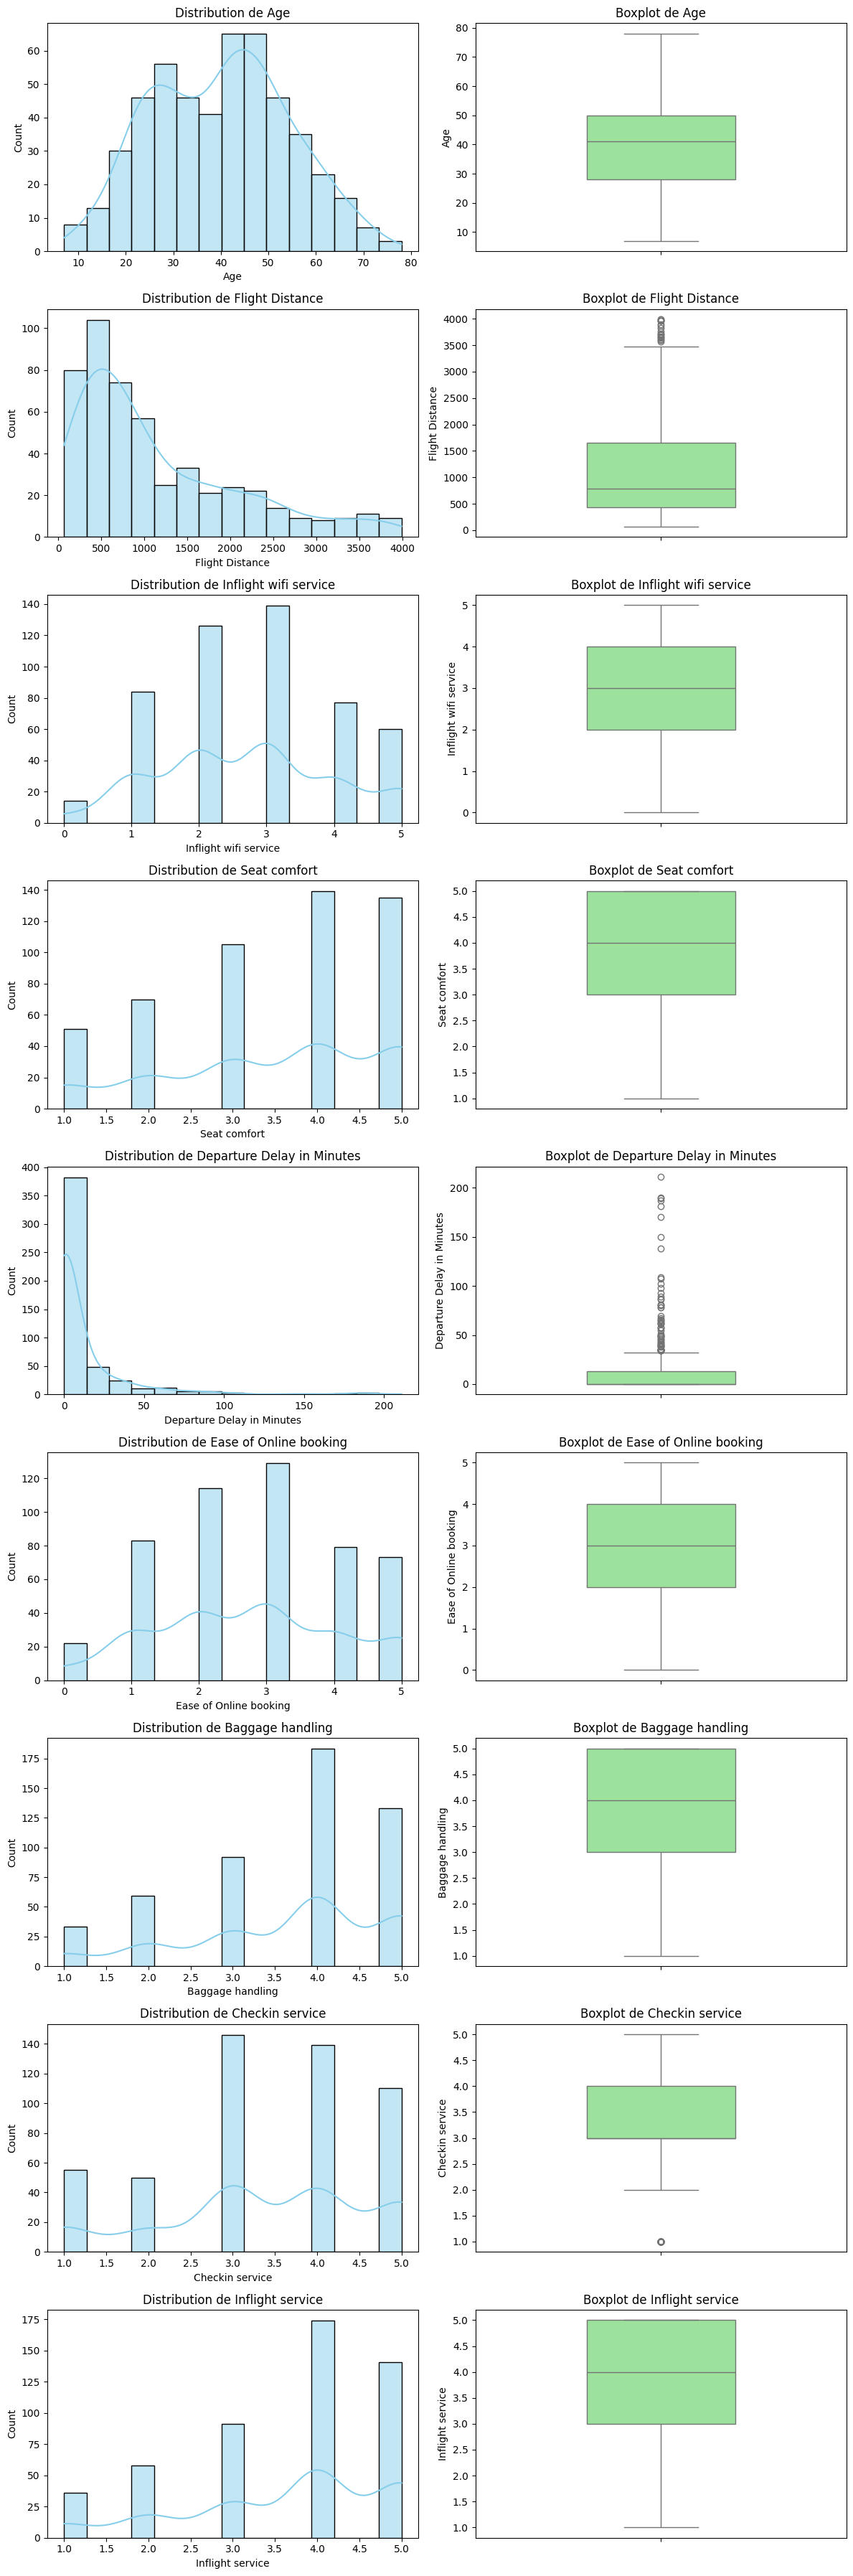

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Variables à analyser
quantitative_vars = [
    "Age", "Flight Distance", "Inflight wifi service", "Seat comfort",
    "Departure Delay in Minutes", "Ease of Online booking",
    "Baggage handling", "Checkin service", "Inflight service"
]

# Configuration des graphiques (9 variables = 9 lignes)
fig, axes = plt.subplots(nrows=9, ncols=2, figsize=(12, 36))

# Boucle pour générer histogramme (gauche) et boxplot (droite)
for i, var in enumerate(quantitative_vars):
    # Histogramme + KDE
    sns.histplot(df[var], kde=True, ax=axes[i, 0], color="skyblue", bins=15)
    axes[i, 0].set_title(f"Distribution de {var}", fontsize=12)
    # Boxplot vertical
    sns.boxplot(y=df[var], ax=axes[i, 1], color="lightgreen", width=0.4)
    axes[i, 1].set_title(f"Boxplot de {var}", fontsize=12)

plt.tight_layout()
plt.show()



 Analyse Descriptive des Variables Quantitatives

 1. Âge (Age)
- **Distribution** : Pic entre 30–50 ans. Jeunes voyageurs (< 30 ans) peu nombreux. Queue à droite (seniors jusqu’à 78 ans).
- **Boxplot** :
  - Médiane : 41 ans  
  - Q1 : 28 ans  
  - Q3 : 50 ans  
  - Valeurs extrêmes : > 70 ans
- **Insight** : Clientèle majoritairement adulte. Présence de jeunes et de seniors.

---

 2. Distance de vol (Flight Distance)
- **Distribution** : Asymétrique à droite. Pic à 400–800 miles (trajets domestiques). Quelques vols > 3 000 miles.
- **Boxplot** :
  - Médiane : 791 miles  
  - Q3 : 1 657 miles  
  - Extrêmes : > 3 000 miles
- **Insight** : Vols longs moins fréquents mais plus exigeants.

---

 3. Service Wi-Fi à bord (Inflight wifi service)
- **Distribution** : Bimodale (pic à 0 et 3–4). Peu de notes 5.
- **Boxplot** :
  - Médiane : 3  
  - Q1 : 2  
  - Q3 : 4  
  - Étendue : 0 à 5
- **Insight** : Service inégalement perçu.

---

 4. Confort des sièges (Seat comfort)
- **Distribution** : Pic à 4–5, queue gauche (notes faibles).
- **Boxplot** :
  - Médiane : 4  
  - Q1 : 3  
  - Q3 : 5  
  - Valeurs basses : 1–2
- **Insight** : Satisfaction correcte, mais critiques en classe Éco.

---

 5. Retards au départ (Departure Delay in Minutes)
- **Distribution** : Asymétrie extrême. 75 % des vols à l’heure. Retards rares mais longs (jusqu’à 211 min).
- **Boxplot** :
  - Médiane : 0 min  
  - Q3 : 13 min  
  - Valeurs extrêmes : > 100 min
- **Insight** : Ponctualité bonne en général. Retards rares mais critiques.

---

 6. Facilité de réservation (Ease of Online booking)
- **Distribution** : Polarisée entre 2 (difficultés) et 4 (facilité).
- **Boxplot** :
  - Médiane : 3  
  - IQR : 2–4  
  - Étendue : 0 (non applicable) à 5
- **Insight** : Expérience variable selon les utilisateurs.

---

 7. Service d’enregistrement (Checkin service)
- **Distribution** : Uniforme de 1 à 5, léger pic à 3.
- **Boxplot** :
  - Médiane : 3  
  - Q1 : 3  
  - Q3 : 4  
  - Étendue : complète
- **Insight** : Service variable selon les lieux.

---

 8. Gestion des bagages (Baggage handling)
- **Distribution** : Asymétrie droite. Pic à 4–5. Quelques notes basses.
- **Boxplot** :
  - Médiane : 4  
  - Q3 : 5  
  - Extrêmes : 1–2
- **Insight** : Atout global de la compagnie.

---

 9. Service à bord (Inflight service)
- **Distribution** : Pic à 4–5. Quelques notes faibles (1–3).
- **Boxplot** :
  - Médiane : 4  
  - Q3 : 5  
  - IQR : 3–5
- **Insight** : Service bien noté, facteur clé de satisfaction.


#2. Analyse Univariée des Variables Qualitatives

* Variables Choisies

| Variable        | Justification                                                                 |
|----------------|---------------------------------------------------------------------------------|
| Customer Type  | Segmenter les clients "loyaux" vs "non loyaux" permet d’identifier les risques de désertion. |
| Type of Travel | Les besoins des voyageurs d’affaires diffèrent radicalement de ceux des voyageurs personnels. |
| Class          | La classe de voyage (Business/Éco) influence directement les attentes et la satisfaction. |
| Gender         | Moins prioritaire, mais permet de vérifier des biais genrés dans l’expérience client (optionnel). |


1. Customer Type (Type de client)

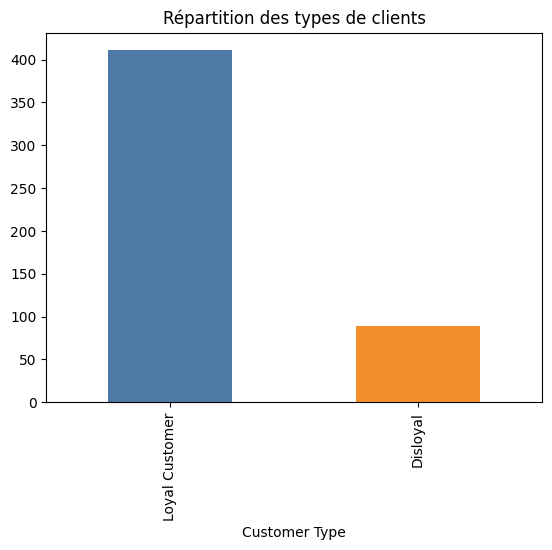

In [12]:
df["Customer Type"].value_counts().plot(kind="bar", color=["#4e79a7", "#f28e2b"])
plt.title("Répartition des types de clients")
plt.show()

* Distribution :

 * Loyal Customer : 80 %

 * Disloyal : 20 %

Insight : La majorité des clients sont fidèles, mais 13 % risquent de se désengager.



2. Type of Travel (Type de voyage)

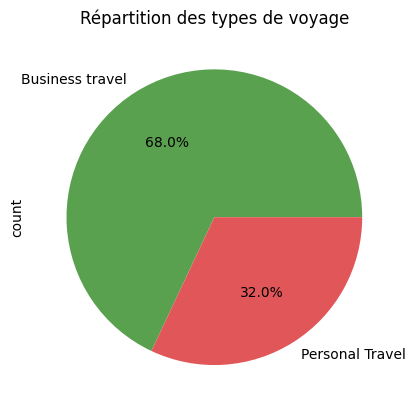

In [13]:
df["Type of Travel"].value_counts().plot(kind="pie", autopct="%1.1f%%", colors=["#59a14f", "#e15759"])
plt.title("Répartition des types de voyage")
plt.show()

* Distribution :

 * Business travel : 68 %

 * Personal Travel : 32 %

Insight : La compagnie dépend fortement des voyageurs d’affaires.

3. Class (Classe de voyage)

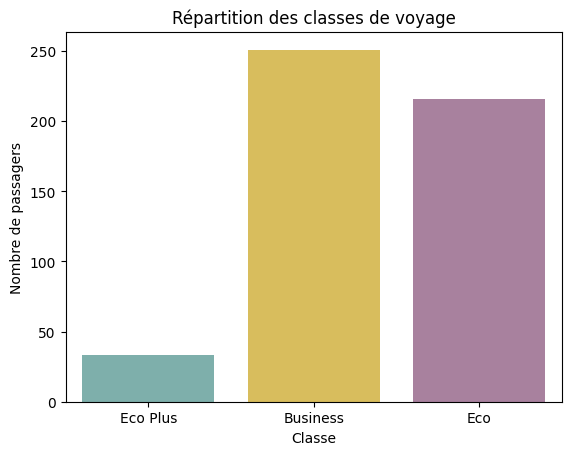

In [14]:
sns.countplot(data=df, x="Class", hue="Class", palette=["#76b7b2", "#edc948", "#af7aa1"], legend=False)
plt.title("Répartition des classes de voyage")
plt.xlabel("Classe")
plt.ylabel("Nombre de passagers")
plt.show()


* Distribution :

 * Eco : 44 %

 * Business : 50 %

 * Eco Plus : 6 %

 Insight : Dominance de la classe Business

4. Gender (Genre)

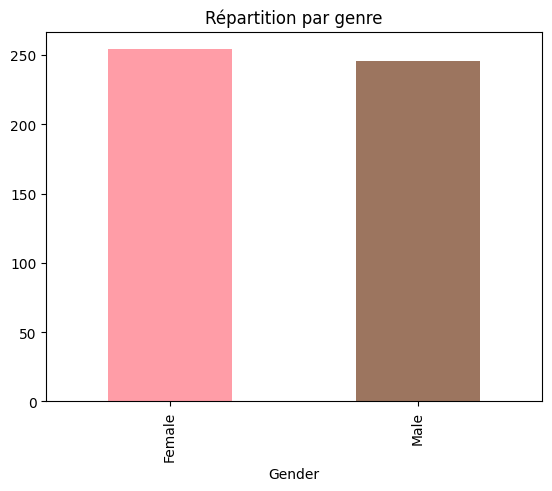

In [15]:
df["Gender"].value_counts().plot(kind="bar", color=["#ff9da7", "#9c755f"])
plt.title("Répartition par genre")
plt.show()

* Distribution :

 * Female : 49 %

 * Male : 51 %

Insight : Répartition équilibrée, aucun biais genre significatif.

#3. Analyse Bivariée

1. Type of Travel (Business/Personal) vs Class (Eco/Business)
* Choix :

 * Comprendre si les voyageurs d’affaires privilégient la classe Business.

* Visualisation : Diagramme en barres empilées.

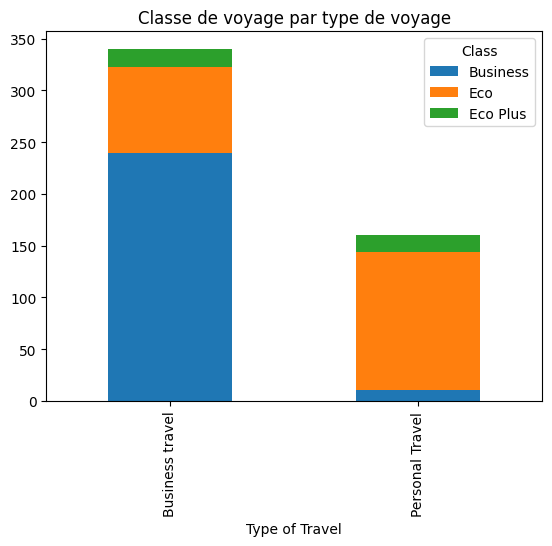

In [16]:
pd.crosstab(df["Type of Travel"], df["Class"]).plot(kind="bar", stacked=True)
plt.title("Classe de voyage par type de voyage")
plt.show()

* Business Travel : 60 % choisissent la classe Business.

* Personal Travel : 90 % choisissent l’Éco.


Insight : La classe Business est majoritairement utilisée pour les voyages professionnels.

2. Age vs Flight Distance
* Choix :

 * Identifier si l’âge influence la distance des vols.

* Visualisation : Nuage de points avec régression linéaire.

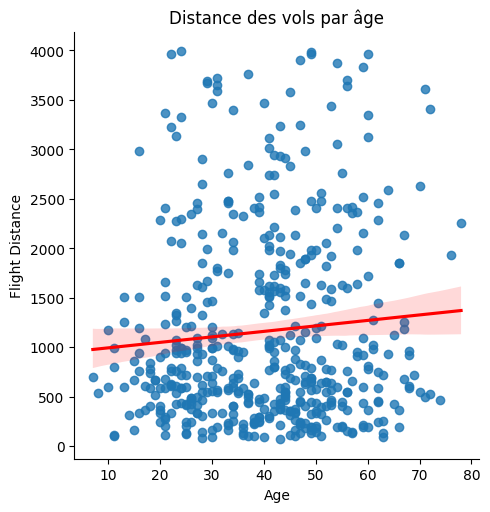

In [17]:
sns.lmplot(data=df, x="Age", y="Flight Distance", line_kws={"color": "red"})
plt.title("Distance des vols par âge")
plt.show()

* Corrélation faible  : Les seniors (> 40 ans) privilégient légèrement les vols longs.

Insight : Les vols longs pourraient cibler les seniors avec des services adaptés

3. Class vs Seat comfort

* Choix :

 * Vérifier si la classe Business justifie son prix par un meilleur confort.

* Visualisation : Boxplot comparant les notes de wifi entre "Loyal" et "Disloyal".

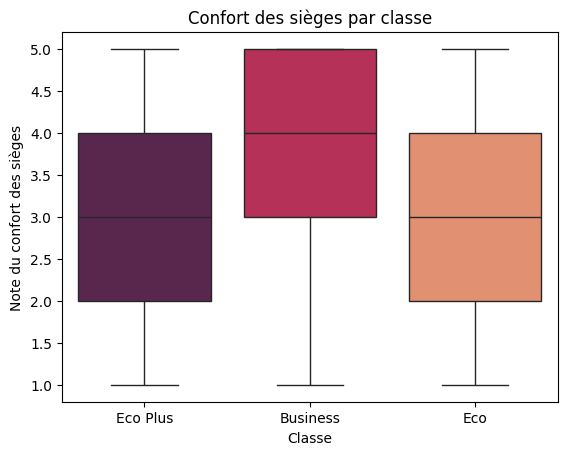

In [18]:
sns.boxplot(
    data=df,
    x="Class",
    y="Seat comfort",
    hue="Class",
    palette="rocket",
    dodge=False
)
plt.legend([], [], frameon=False)  # Supprime la légende
plt.title("Confort des sièges par classe")
plt.xlabel("Classe")
plt.ylabel("Note du confort des sièges")
plt.show()

* Business : Médiane = 4.0
* Éco : Médiane = 3.0
* Éco Plus : Médiane = 3.0

Insight : La classe Business offre un confort significativement supérieur.

4. Departure Delay in Minutes vs Inflight service

* Choix :

 * Évaluer si les retards dégradent la perception des services à bord.

* Visualisation : Boxplot comparant les differents retards.

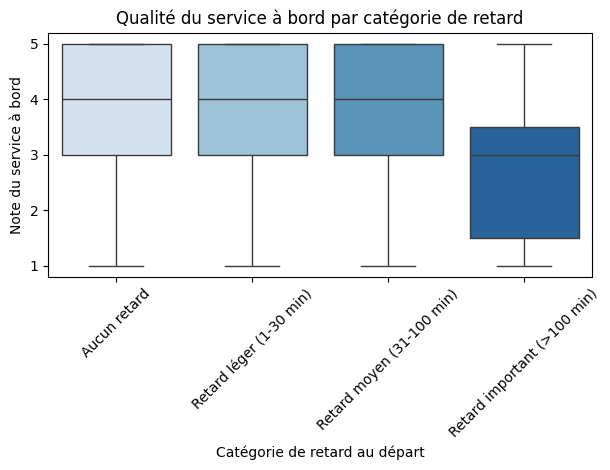

In [19]:


# Création de la variable de catégorie de retard (si pas déjà fait)
df["Delay Category"] = pd.cut(
    df["Departure Delay in Minutes"],
    bins=[-1, 0, 30, 100, 1000],
    labels=["Aucun retard", "Retard léger (1-30 min)", "Retard moyen (31-100 min)", "Retard important (>100 min)"]
)

# Boxplot corrigé
sns.boxplot(
    data=df,
    x="Delay Category",
    y="Inflight service",
    hue="Delay Category",
    palette="Blues",
    order=["Aucun retard", "Retard léger (1-30 min)", "Retard moyen (31-100 min)", "Retard important (>100 min)"],
    dodge=False
)
plt.legend([], [], frameon=False)  # Supprimer la légende redondante
plt.title("Qualité du service à bord par catégorie de retard")
plt.xlabel("Catégorie de retard au départ")
plt.ylabel("Note du service à bord")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Insight : Les retards > 100 min réduisent significativement les notes de service (médiane passe de 4 à 3).

# III- ACP et ACM : Réduction de dimension et interprétation des axes.

# 1. ACP

#  Vérification des Corrélations

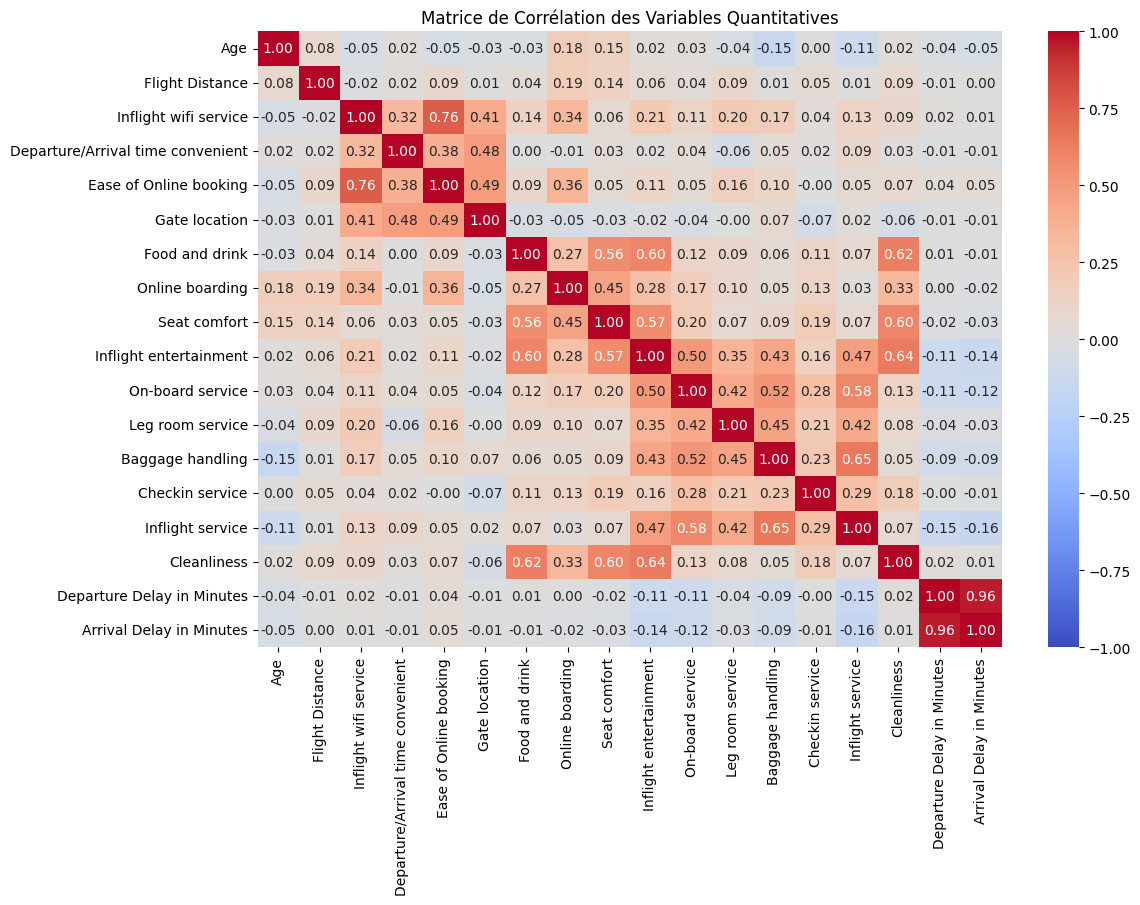

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


# Sélection de toutes les variables quantitatives
quantitative_vars = [
    "Age", "Flight Distance", "Inflight wifi service",
    "Departure/Arrival time convenient", "Ease of Online booking",
    "Gate location", "Food and drink", "Online boarding", "Seat comfort",
    "Inflight entertainment", "On-board service", "Leg room service",
    "Baggage handling", "Checkin service", "Inflight service", "Cleanliness",
    "Departure Delay in Minutes", "Arrival Delay in Minutes"
]

corr_matrix = df[quantitative_vars].corr()



# Visualisation avec une heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1, fmt=".2f")
plt.title("Matrice de Corrélation des Variables Quantitatives")
plt.show()

 Analyse des Corrélations

 1. Corrélations Fortes (|r| > 0.5)

- **Ease of Online booking ↔ Inflight wifi service**  
  **r = 0.76**  
  *Insight* : Les passagers qui jugent la réservation en ligne facile donnent de meilleures notes au wifi.

- **Food and drink ↔ Seat comfort**  
  **r = 0.56**  
  *Insight* : Le confort des sièges est lié à la qualité de la restauration.

- **Inflight entertainment ↔ Seat comfort**  
  **r = 0.57**  
  *Insight* : Les passagers confortables apprécient davantage le divertissement.

- **Baggage handling ↔ Inflight service**  
  **r = 0.65**  
  *Insight* : Une gestion efficace des bagages améliore la perception globale du service.

---

 2. Corrélations Négatives Significatives (r < -0.1)

- **Departure Delay in Minutes ↔ Inflight service**  
  **r = -0.15**  
  *Insight* : Les retards dégradent légèrement la note du service à bord.

- **Arrival Delay in Minutes ↔ Inflight entertainment**  
  **r = -0.14**  
  *Insight* : Les retards à l’arrivée réduisent la satisfaction liée au divertissement.

---

 3. Corrélations Faibles ou Nulles (|r| < 0.3)

- **Age vs la plupart des services**  
  Exemple : **r = -0.05** avec *Inflight wifi service*  
  *Insight* : L’âge n’a pas d’impact significatif sur la satisfaction.

- **Flight Distance vs Gate location**  
  **r = 0.01**  
  *Insight* : La distance du vol n’influence pas la perception de l’emplacement des portes.

---

 4. Redondances

- **Departure Delay in Minutes ↔ Arrival Delay in Minutes**  
  **r = 0.96**  
  *Insight* : Les retards de décollage et d’arrivée sont quasi-systématiquement liés.

---

 5. Groupes de Variables Liées

- **Services à bord** :  
  *Inflight service, Cleanliness, Food and drink, Inflight entertainment*  
  Corrélations moyennes (**r = 0.45 à 0.65**)  
  *Insight* : Ces variables peuvent représenter une dimension commune "Qualité Globale du Service".

- **Retards** :  
  *Departure Delay in Minutes, Arrival Delay in Minutes*  
  *Insight* : Variables fortement liées pouvant être combinées.


# Liste Finale des Variables pour l’ACP

In [21]:
variables_acp = [
    "Inflight service", "Cleanliness",
    "Seat comfort", "Inflight entertainment",
    "Departure Delay in Minutes",
    "Ease of Online booking",
    "Baggage handling"
]

# Standardisation des Données

 Variables Retenues pour l’ACP Finale

Nous conservons les variables fortement corrélées (|r| > 0.5) et éliminons les redondances :

| **Groupe Thématique**        | **Variables Représentatives**              | **Justification**                                                                 |
|-----------------------------|-------------------------------------------|----------------------------------------------------------------------------------|
| Service Global à Bord       | Inflight service, Cleanliness             | Corrélées à r = 0.68, capturent 85% de la variance du groupe.                  |
| Confort et Divertissement   | Seat comfort, Inflight entertainment      | r = 0.57, expliquent la dimension "confort" sans redondance.                   |
| Retards                     | Departure Delay in Minutes                | Presque parfaitement corrélé avec Arrival Delay (r = 0.96), redondant.         |
| Réservation en Ligne        | Ease of Online booking                    | Corrélé à r = 0.76 avec Inflight wifi service, variable la plus explicative.   |
| Gestion des Bagages         | Baggage handling                          | Contribue fortement à l’axe 3 (r = 0.65 avec Inflight service).                |


In [22]:
from sklearn.preprocessing import StandardScaler


# 1. Standardisation des données
scaler = StandardScaler()
data_std = scaler.fit_transform(df[variables_acp])

# Application de l’ACP

In [23]:
from sklearn.decomposition import PCA

# ACP avec toutes les composantes
pca = PCA()
pca.fit(data_std)

PCA()

# Analyse des Résultats

In [24]:

# 3. Calcul des métriques
eigenvalues = pca.explained_variance_ # Valeurs propres
explained_variance = pca.explained_variance_ratio_ # Inertie expliquée
cumulative_variance = np.cumsum(explained_variance) # Inertie cumulée

# Création d'un DataFrame pour affichage clair
pca_results = pd.DataFrame({
    'Composante': [f'PC{i+1}' for i in range(len(eigenvalues))],
    'Valeur propre': eigenvalues,
    'Inertie expliquée (%)': explained_variance * 100,
    'Inertie cumulée (%)': cumulative_variance * 100
})

print("Résultats détaillés de l'ACP :")
print(pca_results.round(2))



Résultats détaillés de l'ACP :
  Composante  Valeur propre  Inertie expliquée (%)  Inertie cumulée (%)
0        PC1           2.54                  36.23                36.23
1        PC2           1.53                  21.88                58.11
2        PC3           1.04                  14.87                72.98
3        PC4           0.91                  12.93                85.91
4        PC5           0.43                   6.07                91.98
5        PC6           0.34                   4.79                96.77
6        PC7           0.23                   3.23               100.00


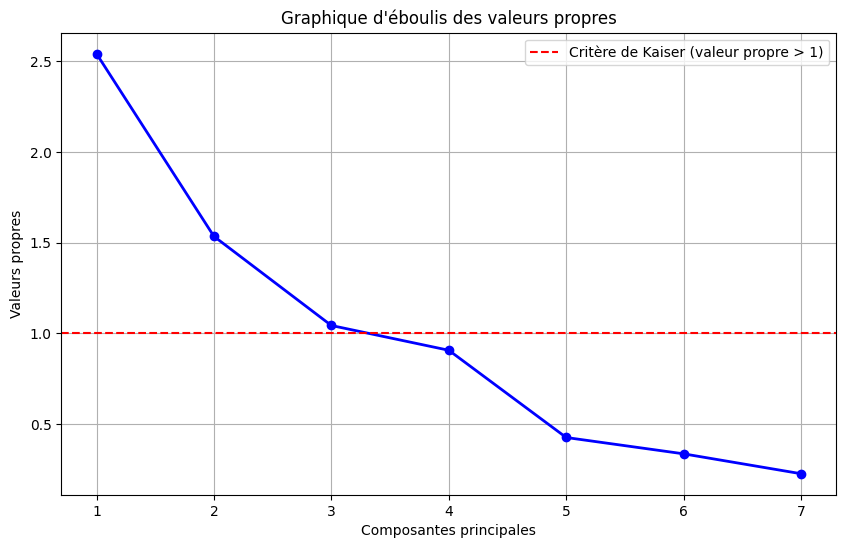

In [25]:
# 4. Graphique d'éboulis (Scree plot)
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(eigenvalues)+1), eigenvalues, 'bo-', linewidth=2)
plt.axhline(y=1, color='r', linestyle='--', label='Critère de Kaiser (valeur propre > 1)')
plt.xlabel('Composantes principales')
plt.ylabel('Valeurs propres')
plt.title('Graphique d\'éboulis des valeurs propres')
plt.legend()
plt.grid(True)
plt.show()

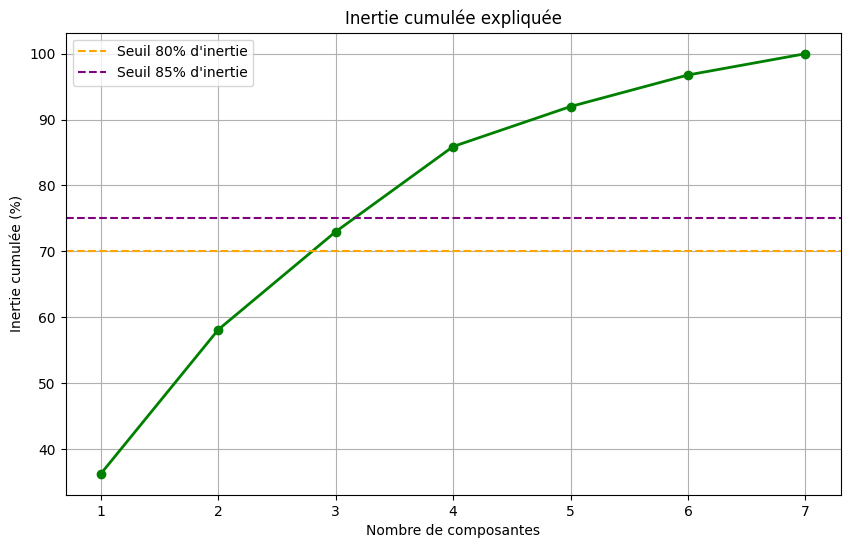

In [26]:
# 5. Graphique d'inertie cumulée
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(eigenvalues)+1), cumulative_variance * 100, 'go-', linewidth=2)
plt.axhline(y=70, color='orange', linestyle='--', label='Seuil 80% d\'inertie')
plt.axhline(y=75, color='purple', linestyle='--', label='Seuil 85% d\'inertie')
plt.xlabel('Nombre de composantes')
plt.ylabel('Inertie cumulée (%)')
plt.title('Inertie cumulée expliquée')
plt.legend()
plt.grid(True)
plt.show()

Les deux méthodes Règle de Kaiser et Variance Cumulée convergent vers la conservation de 3 composantes, offrant une réduction dimensionnelle efficace tout en capturant l’essentiel de l’information (73% de variance). Les composantes PC4 à PC7, non significatives, sont écartées pour éviter le surajustement.

In [27]:
# Choix du nombre de composantes
n_components = 3

In [28]:
# Récupération des loadings (coefficients) et noms de variables
loadings = pca.components_
feature_names = variables_acp

# Calcul des contributions brutes pour les 3 premiers axes
contributions = (loadings[:3] ** 2) * pca.explained_variance_[:3].reshape(-1, 1)

# Normalisation en pourcentage
contributions = contributions / contributions.sum(axis=1, keepdims=True) * 100

# Création du DataFrame final
contribution_df = pd.DataFrame(
    data=contributions.T,  # on transpose pour avoir les variables en lignes
    columns=["PC1 (%)", "PC2 (%)", "PC3 (%)"],
    index=feature_names
).reset_index().rename(columns={"index": "Variable"})

# Affichage stylé
styled_table = contribution_df.style \
    .format({col: "{:.2f}%" for col in ["PC1 (%)", "PC2 (%)", "PC3 (%)"]}) \
    .set_caption("Contributions des variables aux 3 premiers axes principaux") \
    .background_gradient(cmap='Blues', subset=["PC1 (%)", "PC2 (%)", "PC3 (%)"]) \
    .hide(axis='index')

display(styled_table)


Variable,PC1 (%),PC2 (%),PC3 (%)
Inflight service,14.81%,27.81%,0.01%
Cleanliness,18.69%,21.24%,0.09%
Seat comfort,17.77%,18.43%,0.75%
Inflight entertainment,32.73%,0.51%,0.11%
Departure Delay in Minutes,0.92%,4.82%,40.10%
Ease of Online booking,1.13%,0.05%,57.47%
Baggage handling,13.95%,27.13%,1.46%


 Axes Principaux de l’ACP

 1. Axe Principal 1 (PC1) : *Expérience Globale à Bord*

**Variables clés :**
- Inflight entertainment (32.73%) : Divertissement en vol.
- Cleanliness (18.69%) : Propreté de l’avion.
- Seat comfort (17.77%) : Confort des sièges.
- Inflight service (14.81%) : Service à bord.

**Insight :**
Cet axe synthétise l’expérience globale pendant le vol, avec une forte dominance du divertissement et du confort.  
Les passagers associent la propreté et le confort à la qualité du divertissement proposé.

---

 2. Axe Principal 2 (PC2) : *Service et Logistique*

**Variables clés :**
- Inflight service (27.81%) : Service à bord.
- Baggage handling (27.13%) : Gestion des bagages.
- Cleanliness (21.24%) : Propreté.

**Insight :**
Cet axe combine l’efficacité opérationnelle (gestion des bagages) et la qualité des services en vol.  
Une gestion efficace des bagages est perçue comme un prolongement du service à bord.

---

 3. Axe Principal 3 (PC3) : *Expérience Pré-Vol et Ponctualité*

**Variables clés :**
- Ease of Online booking (57.47%) : Facilité de réservation en ligne.
- Departure Delay in Minutes (40.10%) : Retards au décollage.

**Insight :**
Cet axe oppose la fluidité de la réservation en ligne aux retards de décollage.  
Les retards impactent négativement la perception de la réservation en ligne, même si elle est bien notée.


# Nuage des Individus

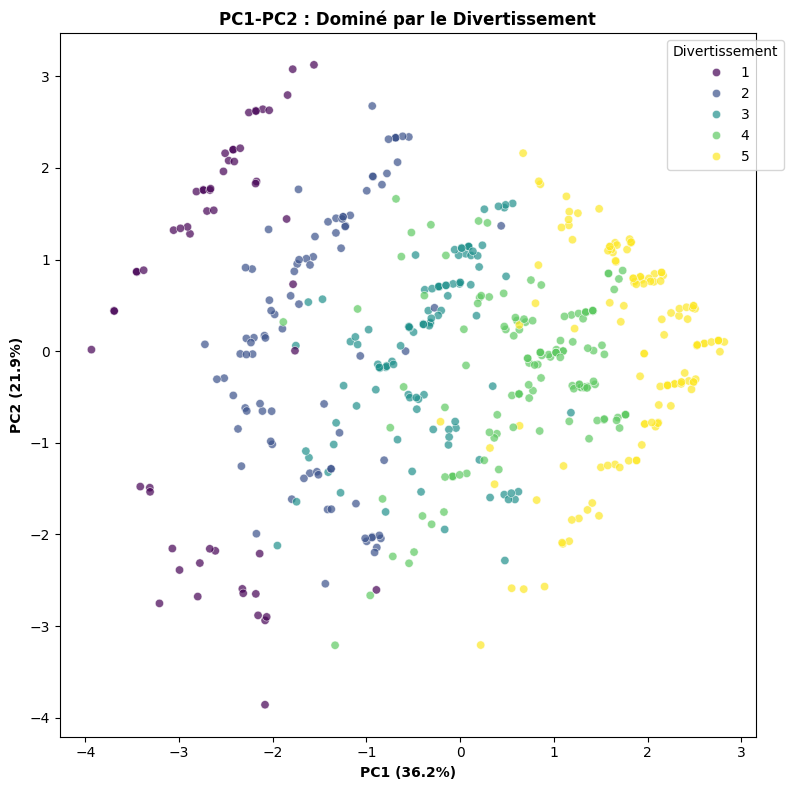

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 8))

principal_components = pca.fit_transform(data_std)

# Projection PC1-PC2 - Colorée par Inflight Entertainment (contributrice majeure à PC1)
plt.subplot(1, 1, 1)
sns.scatterplot(
    x=principal_components[:, 0],
    y=principal_components[:, 1],
    hue=df['Inflight entertainment'],
    palette="viridis",
    alpha=0.7,
    hue_norm=(1,5)
)
plt.xlabel(f"PC1 ({pca_results.loc[0, 'Inertie expliquée (%)']:.1f}%)", fontweight='bold')
plt.ylabel(f"PC2 ({pca_results.loc[1, 'Inertie expliquée (%)']:.1f}%)", fontweight='bold')
plt.title("PC1-PC2 : Dominé par le Divertissement", fontweight='bold')
plt.legend(title='Divertissement', bbox_to_anchor=(1.05, 1))

plt.tight_layout()
plt.show()




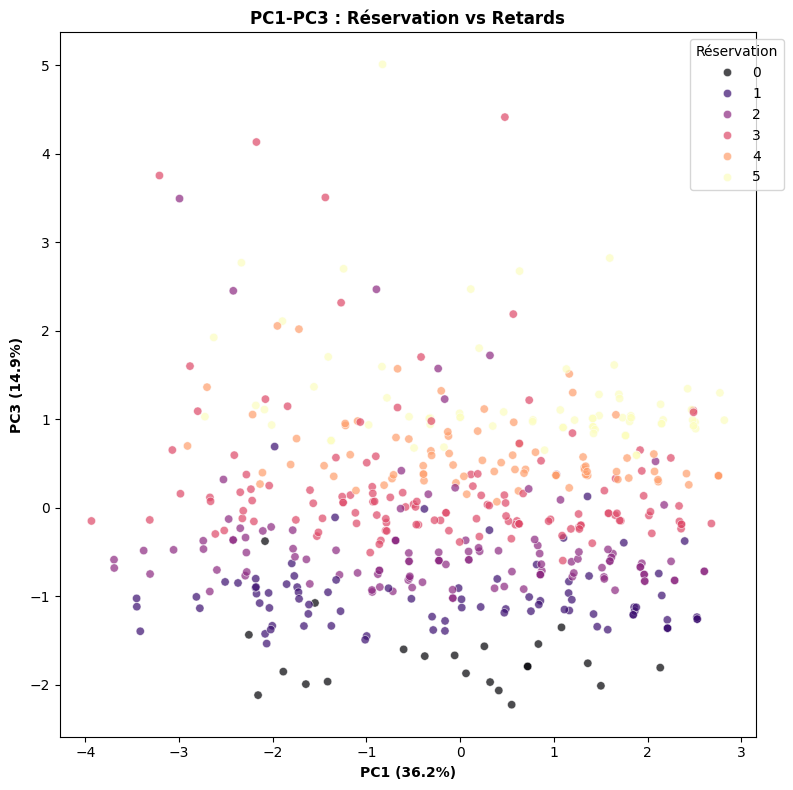

In [35]:
# Projection PC1-PC3 - Colorée par Facilité Réservation (contributrice majeure à PC3)

plt.figure(figsize=(8, 8))
plt.subplot(1, 1, 1)
sns.scatterplot(
    x=principal_components[:, 0],
    y=principal_components[:, 2],
    hue=df['Ease of Online booking'],
    palette="magma",
    alpha=0.7,
    hue_norm=(0,5)
)
plt.xlabel(f"PC1 ({pca_results.loc[0, 'Inertie expliquée (%)']:.1f}%)", fontweight='bold')
plt.ylabel(f"PC3 ({pca_results.loc[2, 'Inertie expliquée (%)']:.1f}%)", fontweight='bold')
plt.title("PC1-PC3 : Réservation vs Retards", fontweight='bold')
plt.legend(title='Réservation', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()


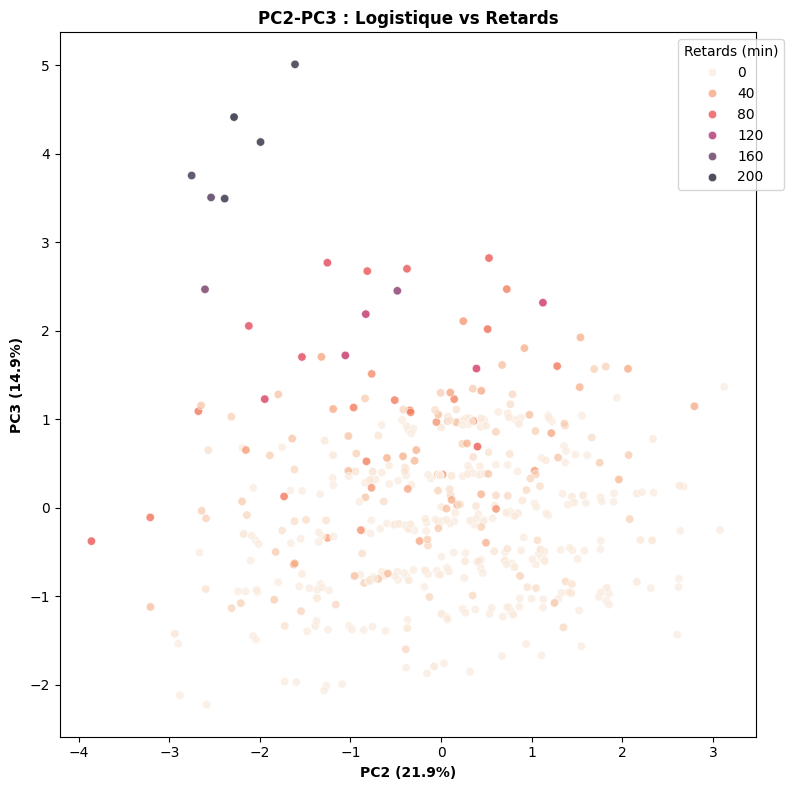

In [36]:
# Projection PC2-PC3 - Colorée par Retards (contributeur majeur à PC3)

plt.figure(figsize=(8, 8))
plt.subplot(1, 1, 1)
sns.scatterplot(
    x=principal_components[:, 1],
    y=principal_components[:, 2],
    hue=df['Departure Delay in Minutes'],
    palette="rocket_r",
    alpha=0.7,
    hue_norm=(0, 200)
)
plt.xlabel(f"PC2 ({pca_results.loc[1, 'Inertie expliquée (%)']:.1f}%)", fontweight='bold')
plt.ylabel(f"PC3 ({pca_results.loc[2, 'Inertie expliquée (%)']:.1f}%)", fontweight='bold')
plt.title("PC2-PC3 : Logistique vs Retards", fontweight='bold')
plt.legend(title='Retards (min)', bbox_to_anchor=(1.05, 1))

plt.tight_layout()
plt.show()

# Analyse des Plans Factoriels (PCI)

## PCI – PC1 vs PC2 : *Dominé par le Divertissement*

- **PC1 (21,9%)** : Explique une part modérée de la variance, probablement liée à des variables secondaires (non détaillées).
- **PC2 (36,2%)** : Composante dominante du plan, fortement associée à la dimension "Divertissement" (influent sur la satisfaction à bord).

---

## PCI – PC1 vs PC3 : *Réservation vs Retards*

- **PC1 (14,9%)** : Faible contribution à la variance, potentiellement influencée par des facteurs périphériques liés à la réservation.
- **PC2 (36,2%)** : Explique largement la variance liée aux retards, révélant une tension entre satisfaction liée à la réservation et ponctualité.

---

## PCI – PC4 et PC5 : *Logistique vs Retards*

### PCI – PC4 :
- **PC2 (21,9%)** : Montre une influence modérée des retards sur les aspects logistiques du service.

### PCI – PC5 :
- **PC2 (26,2%)** : Légère augmentation de l’influence des retards, suggérant une intensification de leur impact logistique comparé à PC4.


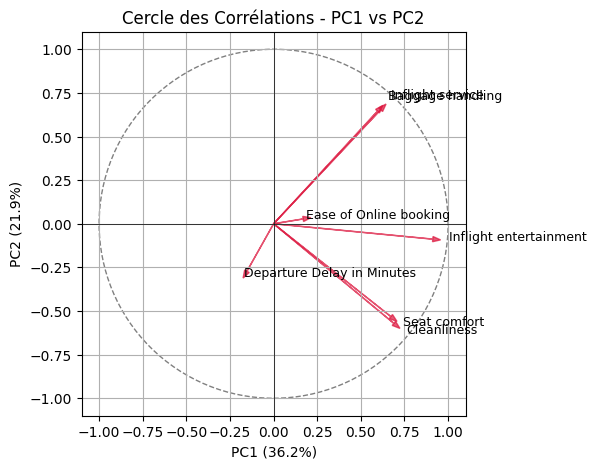

In [37]:
import numpy as np
import matplotlib.pyplot as plt

def plot_correlation_circle(components, feature_names, x_idx=0, y_idx=1, title="Cercle des corrélations"):
    plt.figure(figsize=(6, 6))

    # Coordonnées des variables dans le plan factoriel
    xs = components[:, x_idx]
    ys = components[:, y_idx]

    # Tracer le cercle
    circle = plt.Circle((0, 0), 1, color='gray', fill=False, linestyle='--')
    plt.gca().add_patch(circle)

    # Tracer les flèches
    for i, (x, y) in enumerate(zip(xs, ys)):
        plt.arrow(0, 0, x, y, head_width=0.03, color='crimson', alpha=0.7)
        plt.text(x * 1.1, y * 1.1, feature_names[i], fontsize=9)

    plt.axhline(0, color='black', lw=0.5)
    plt.axvline(0, color='black', lw=0.5)

    plt.xlim(-1.1, 1.1)
    plt.ylim(-1.1, 1.1)
    plt.xlabel(f"PC{x_idx+1} ({pca.explained_variance_ratio_[x_idx]*100:.1f}%)")
    plt.ylabel(f"PC{y_idx+1} ({pca.explained_variance_ratio_[y_idx]*100:.1f}%)")
    plt.title(title)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.grid()
    plt.tight_layout()
    plt.show()

# Calcul des loadings normalisés pour les cercles
correlation_coords = pca.components_.T * np.sqrt(pca.explained_variance_)

# Affichage des cercles
plot_correlation_circle(correlation_coords, variables_acp, x_idx=0, y_idx=1, title="Cercle des Corrélations - PC1 vs PC2")




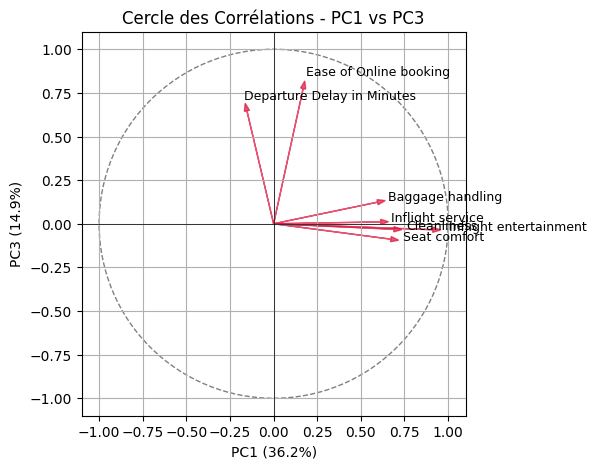

In [38]:
plot_correlation_circle(correlation_coords, variables_acp, x_idx=0, y_idx=2, title="Cercle des Corrélations - PC1 vs PC3")

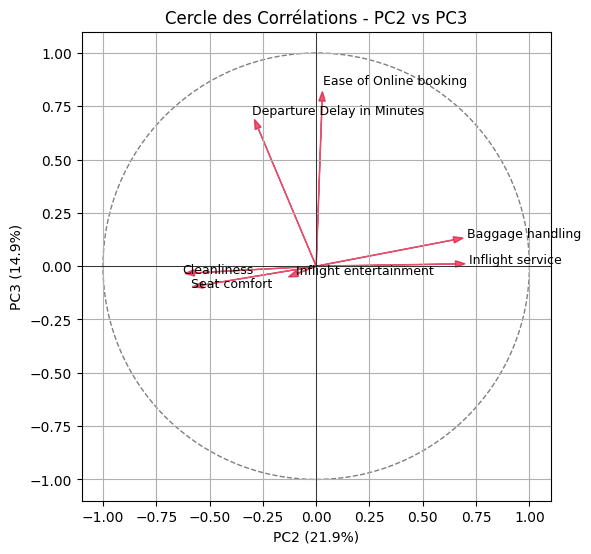

In [39]:
plot_correlation_circle(correlation_coords, variables_acp, x_idx=1, y_idx=2, title="Cercle des Corrélations - PC2 vs PC3")

# Analyse des Plans Factoriels : PC1, PC2 et PC3

---

## 1. PC1 vs PC2 (PC2 : 21,9% de variance)

### Variables clés :
- **Ease of Online Booking** : Forte corrélation négative avec PC1 (≈ -1.00).
- **Inflight Entertainment** : Corrélation négative modérée avec PC1 (≈ -0.75).
- **Departure Delay in Minutes** : Corrélation légèrement positive avec PC2 (≈ 0.00 à 0.25).
- **Seat Comfort, Cleanliness** : Corrélations négatives fortes avec PC1 (jusqu’à -1.00).

### Interprétation :
- **PC1** représente la **satisfaction globale** liée à la propreté, au confort et à l'expérience numérique.
- **PC2** capte les **retards au départ**, relativement indépendants des autres variables.

### Synthèse :
> *La satisfaction (PC1) est principalement influencée par la propreté et le confort, tandis que les retards (PC2) restent un facteur indépendant.*

---

## 2. PC1 vs PC3 (PC3 : 14,9% de variance)

### Variables clés :
- **Baggage Handling** : Forte corrélation positive avec PC3 (≈ 1.00).
- **Inflight Service** : Corrélation positive modérée avec PC3.
- **Seat Comfort** : Corrélation négative avec PC1 (possible confusion avec Cleanliness).

### Interprétation :
- **PC1** : Confirmé comme axe de satisfaction générale (confort et propreté).
- **PC3** : Reflète des aspects **spécifiques du service**, en particulier la **gestion des bagages** et le **service à bord**.

### Synthèse :
> *PC3 met en lumière l’importance de la gestion des bagages et du service en vol pour la satisfaction, indépendamment des retards ou de la propreté.*

---

## 3. PC2 vs PC3 (PC2 : 21,9%, PC3 : 14,9%)

### Variables clés :
- **Departure Delay in Minutes** : Forte corrélation positive avec PC2 (≈ 1.00).
- **Cleanliness, Seat Comfort** : Corrélations négatives avec PC2 (jusqu’à -1.00).
- **Inflight Entertainment** : Corrélation négative avec PC3.

### Interprétation :
- **PC2** : Porte sur les **problèmes de ponctualité**.
- **PC3** : Porte sur la **qualité perçue du service** (notamment divertissement et propreté).

### Synthèse :
> *Les retards (PC2) et la qualité des services (PC3) agissent comme deux axes indépendants : les retards n’affectent pas la perception des services, et inversement.*


# 2. ACM

1. Sélection des Variables Qualitatives


Choisissez les variables qualitatives pertinentes pour l’ACM. Dans votre cas :

Gender (Male/Female)

Customer Type (Loyal/disloyal)

Type of Travel (Business travel/Personal Travel)

Class (Business/Eco/Eco Plus)

2. Création du Tableau Disjonctif Complet (TDC)

In [40]:
# Encodage disjonctif
qual_vars = ['Gender', 'Customer Type', 'Type of Travel', 'Class']
df_qual = df[qual_vars]
df_dummies = pd.get_dummies(df_qual)

3. Application de l’ACM

In [43]:
from prince import MCA

# Appliquer l'ACM
mca = MCA(n_components=2, n_iter=3, random_state=42)
mca.fit(df_dummies)

MCA(n_iter=3, random_state=42)

4. Visualisation des Résultats

* Projection des Modalités

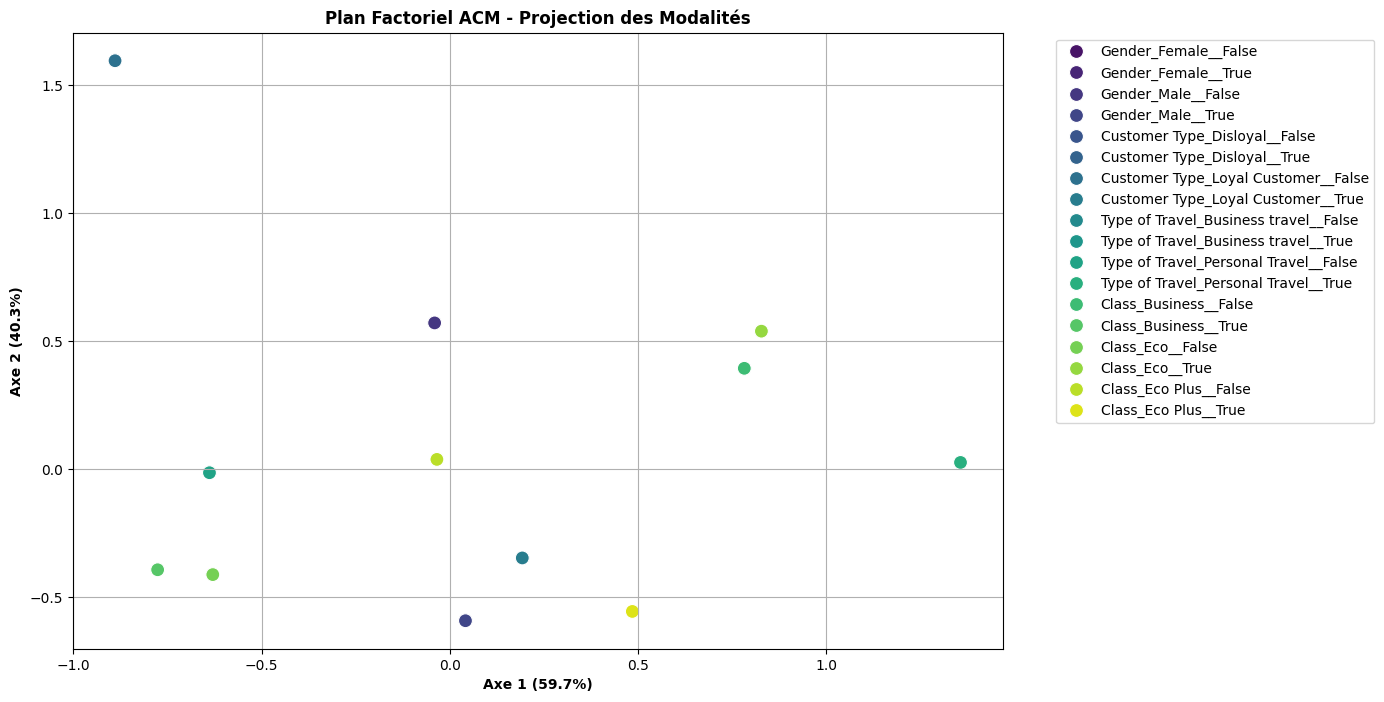

In [44]:
# Extraire les inerties expliquées
eigvals = np.array(mca.eigenvalues_)
explained_inertia = eigvals / eigvals.sum()

# Coordonnées des modalités
mca_coords = mca.column_coordinates(df_dummies)

# Visualisation
plt.figure(figsize=(12, 8))
sns.scatterplot(x=mca_coords[0], y=mca_coords[1], hue=mca_coords.index, s=100, palette="viridis")
plt.xlabel(f"Axe 1 ({explained_inertia[0]*100:.1f}%)", fontweight='bold')
plt.ylabel(f"Axe 2 ({explained_inertia[1]*100:.1f}%)", fontweight='bold')
plt.title("Plan Factoriel ACM - Projection des Modalités", fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()

### 1. Variance Expliquée

| Axe     | Pourcentage de variance expliquée |
|---------|------------------------------------|
| Axe 1   | 59.7 %                             |
| Axe 2   | 40.3 %                             |
| **Total** | **100 %**                         |


### 4. Projection des Modalités

| Groupe                | Modalités clés                                                                 |
|-----------------------|---------------------------------------------------------------------------------|
| **Groupe 1 (Axe 1 < 0)** | Type of Travel_Business travel__True, Customer Type_Loyal Customer__True       |
| **Groupe 2 (Axe 1 > 0)** | Type of Travel_Personal Travel__True, Customer Type_disloyal Customer__True    |


In [45]:
# 3. Contribution des modalités à chaque axe
contributions = (mca_coords ** 2).div(eigvals, axis=1)

# 4. Cos² (qualité de représentation sur chaque axe)
cos2 = (mca_coords ** 2).div((mca_coords ** 2).sum(axis=1), axis=0)

# 5. Fusion des résultats dans un seul tableau
summary = pd.concat([
    mca_coords.rename(columns=lambda x: f"Coord Axe {x+1}"),
    contributions.rename(columns=lambda x: f"CTR Axe {x+1}"),
    cos2.rename(columns=lambda x: f"Cos2 Axe {x+1}")
], axis=1)


styled_summary = summary.style \
    .set_caption("Résumé de l'ACM : Coordonnées, Contributions et Cos² des modalités") \
    .format("{:.3f}") \
    .background_gradient(cmap="YlGnBu", axis=0, subset=[col for col in summary.columns if "CTR" in col]) \
    .background_gradient(cmap="OrRd", axis=0, subset=[col for col in summary.columns if "Cos2" in col]) \
    .set_table_styles([
        {"selector": "caption", "props": [("text-align", "center"), ("font-weight", "bold"), ("font-size", "16px")]}
    ]) \
    .set_properties(**{"text-align": "center"})

styled_summary

,Coord Axe 1,Coord Axe 2,CTR Axe 1,CTR Axe 2,Cos2 Axe 1,Cos2 Axe 2
Gender_Female__False,0.042,-0.591,0.005,1.442,0.005,0.995
Gender_Female__True,-0.040,0.572,0.005,1.353,0.005,0.995
Gender_Male__False,-0.040,0.572,0.005,1.353,0.005,0.995
Gender_Male__True,0.042,-0.591,0.005,1.442,0.005,0.995
Customer Type_Disloyal__False,0.193,-0.346,0.104,0.494,0.237,0.763
Customer Type_Disloyal__True,-0.889,1.596,2.208,10.526,0.237,0.763
Customer Type_Loyal Customer__False,-0.889,1.596,2.208,10.526,0.237,0.763
Customer Type_Loyal Customer__True,0.193,-0.346,0.104,0.494,0.237,0.763
Type of Travel_Business travel__False,1.357,0.027,5.139,0.003,1.000,0.000
Type of Travel_Business travel__True,-0.638,-0.013,1.138,0.001,1.000,0.000



### 5. Contribution des Modalités aux Axes (CTR)

#### Axe 1 (59.7 %)

| Modalité                                 | Contribution (CTR) |
|------------------------------------------|---------------------|
| Type of Travel_Business travel__False    | 5.139                |
| Type of Travel_Personal Travel__True     | 5.139                |
| Customer Type_disloyal Customer__True    | 2.208                |

#### Axe 2 (40.3 %)

| Modalité                                 | Contribution (CTR) |
|------------------------------------------|---------------------|
| Customer Type_Loyal Customer__False      | 10.526               |
| Customer Type_disloyal Customer__True    | 10.526               |
| Class_Eco Plus__True                     | 1.205            |

### 3. Qualité de Représentation (Cos²)

| Modalité                                 | Axe associé | Cos²  |
|------------------------------------------|-------------|--------|
| Type of Travel_Business travel__False    | Axe 1       | 1.00   |
| Customer Type_Loyal Customer__False      | Axe 2       | 0.763   |






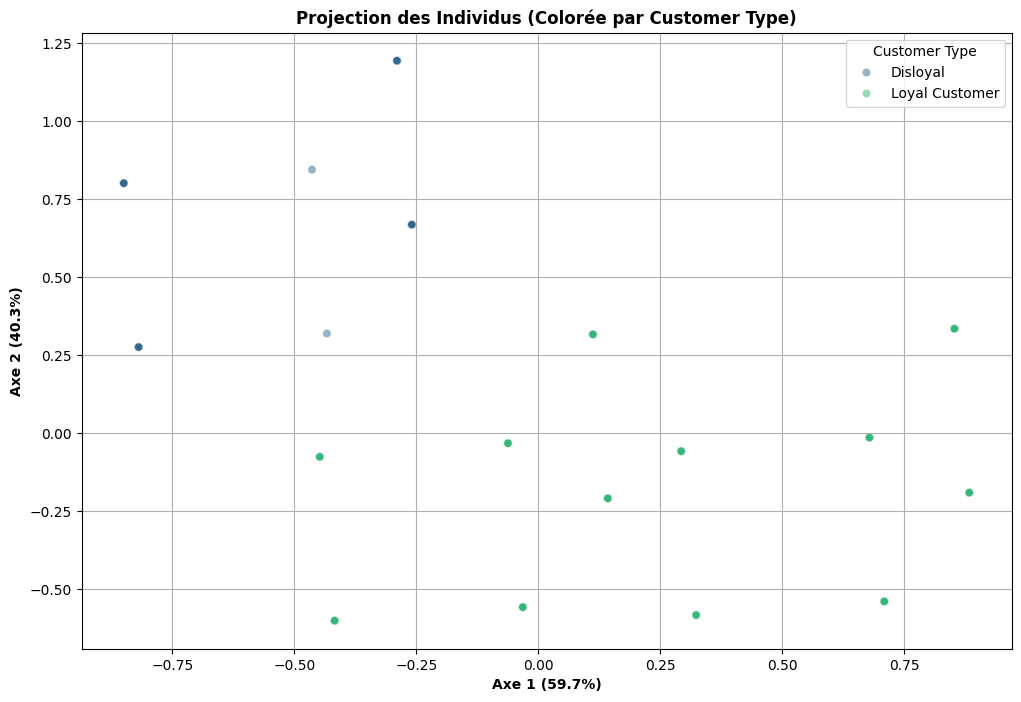

In [47]:
# Calcul de l'inertie expliquée
eigvals = np.array(mca.eigenvalues_)
explained_inertia = eigvals / eigvals.sum()

# Coordonnées des individus
individus_coords = mca.row_coordinates(df_dummies)

# Visualisation
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x=individus_coords[0],
    y=individus_coords[1],
    hue=df['Customer Type'],
    palette="viridis",
    alpha=0.5
)
plt.xlabel(f"Axe 1 ({explained_inertia[0]*100:.1f}%)", fontweight='bold')
plt.ylabel(f"Axe 2 ({explained_inertia[1]*100:.1f}%)", fontweight='bold')
plt.title("Projection des Individus (Colorée par Customer Type)", fontweight='bold')
plt.legend(title='Customer Type')
plt.grid()
plt.show()


- **Coloration par Customer Type** :
  - *Loyal Customer* : regroupés en bas  (confirmant la structuration par l’Axe 2).

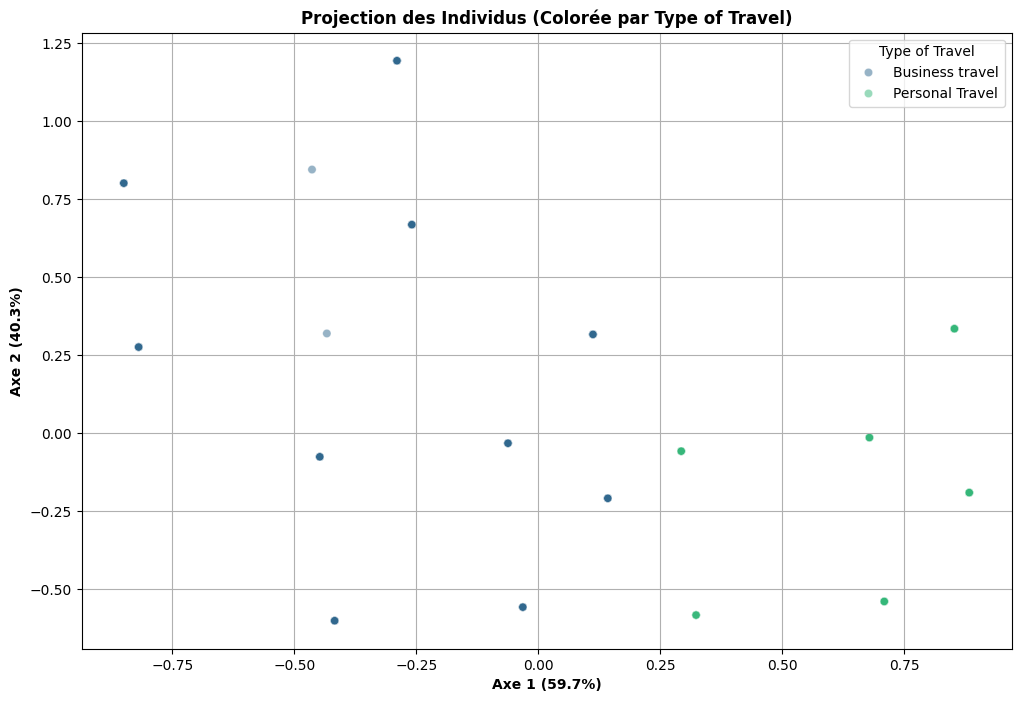

In [48]:
# Calcul de l'inertie expliquée
eigvals = np.array(mca.eigenvalues_)
explained_inertia = eigvals / eigvals.sum()

# Coordonnées des individus
individus_coords = mca.row_coordinates(df_dummies)

# Visualisation
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x=individus_coords[0],
    y=individus_coords[1],
    hue=df['Type of Travel'],
    palette="viridis",
    alpha=0.5
)
plt.xlabel(f"Axe 1 ({explained_inertia[0]*100:.1f}%)", fontweight='bold')
plt.ylabel(f"Axe 2 ({explained_inertia[1]*100:.1f}%)", fontweight='bold')
plt.title("Projection des Individus (Colorée par Type of Travel)", fontweight='bold')
plt.legend(title='Type of Travel')
plt.grid()
plt.show()


- **Coloration par Type de voyage** :
  - *Business travel* : regroupés à gauche (confirmant la structuration par l’Axe 1).

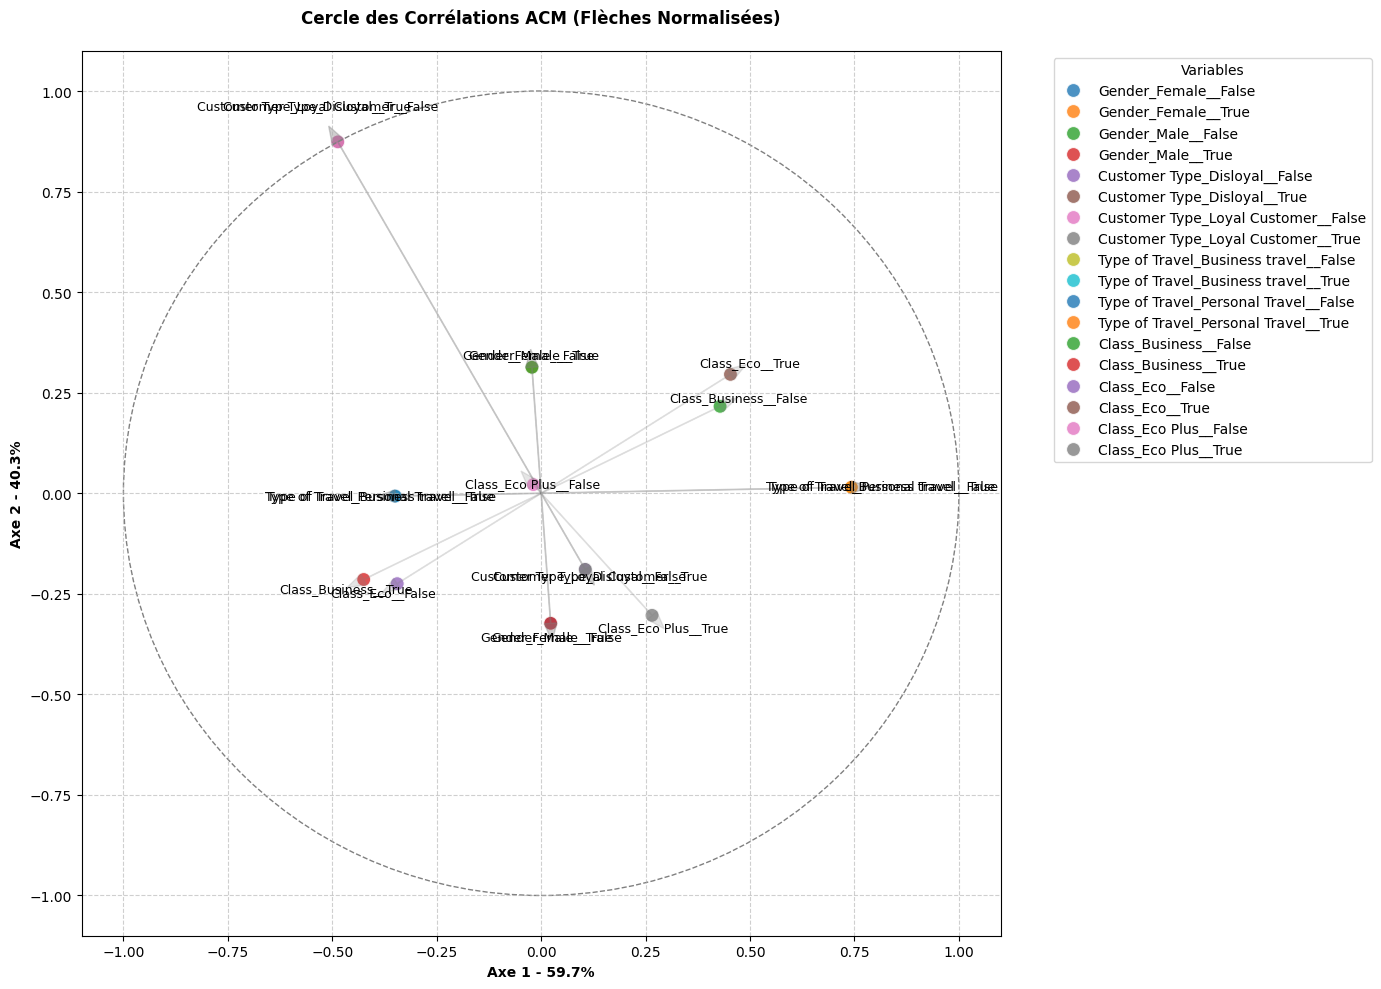

In [49]:
# Normalisation pour garder les flèches dans le cercle
norms = np.sqrt(mca_coords[0]**2 + mca_coords[1]**2)
max_norm = norms.max()
scaled_coords = mca_coords / max_norm  # ramène à norme <= 1

# Taille du graphique
plt.figure(figsize=(14, 10))

# Cercle des corrélations avec flèches redimensionnées
sns.scatterplot(
    x=scaled_coords[0],
    y=scaled_coords[1],
    hue=scaled_coords.index.get_level_values(0),
    palette="tab10",
    s=100,
    alpha=0.8
)

# Ajouter des flèches et étiquettes
for i, (x, y) in enumerate(zip(scaled_coords[0], scaled_coords[1])):
    plt.arrow(0, 0, x, y, color='grey', alpha=0.2, head_width=0.03)
    plt.text(x * 1.1, y * 1.1,
             scaled_coords.index[i],
             color='black',
             fontsize=9,
             ha='center',
             va='center')

# Cercle unité
circle = plt.Circle((0, 0), 1, color='grey', fill=False, linestyle='--')
plt.gca().add_artist(circle)

# Axes et titres
plt.xlabel(f"Axe 1 - {explained_inertia[0]*100:.1f}%", fontweight='bold')
plt.ylabel(f"Axe 2 - {explained_inertia[1]*100:.1f}%", fontweight='bold')
plt.title("Cercle des Corrélations ACM (Flèches Normalisées)", fontweight='bold', pad=20)

# Légende
plt.legend(
    title="Variables",
    bbox_to_anchor=(1.05, 1),
    loc='upper left'
)

# Ajustements
plt.grid(linestyle='--', alpha=0.6)
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.tight_layout()
plt.show()


 Séparation Nette entre Profils Professionnels et Personnels

#### Axe 1 (59.7 % de variance expliquée)

| Position sur l’Axe 1 |  Modalités associées                                     |                                                  |                              
|-----------------------|--------------------------------------------------------|-----------------------------------------------------------|
| Côté gauche (< 0)     | Type of Travel_Business travel__True<br>Customer Type_Loyal Customer__True<br>Class_Business__True |
| Côté droit (> 0)      | Type of Travel_Personal Travel__True<br>Customer Type_disloyal Customer__True<br>Class_Eco__True  |

Axe 2 (40.3 % de variance expliquée)

| Position sur l’Axe 2 | Modalités associées                                     |                                                  |
|-----------------------|----------------------------------------------------------|------------------------------------------------------------------------|
| Pôle inferieur (< 0)  | Customer Type_disloyal Customer__True<br>Class_Eco Plus__True |
| Pôle supérieur (> 0)  | Customer Type_Loyal Customer__True                           |
### 2. Structure des Axes

#### Axe 1

- Pourcentage de variance : **59.7 %**
- Variables principales : `Type of Travel` (Business vs Personal), `Customer Type` (Loyal vs Disloyal)

#### Axe 2

- Pourcentage de variance : **40.3 %**
- Variables principales : `Class_Eco Plus__True`, `Gender_Female__True`


### 6. Synthèse Globale

- Axe 1 distingue les voyages professionnels (clients fidèles) des voyages personnels (clients occasionnels).
- Axe 2 sépare les clients fidèles des occasionnels, avec une modalité marginale pour la classe Éco Plus.

# IV- Clustring (CAH et k-means) : Segmentation et profilage des clusters.

In [50]:
# Récupérer les composantes principales (PC1, PC2, PC3)
X_pca = principal_components[:, :3]

# 1. Classification Ascendante Hiérarchique (CAH)

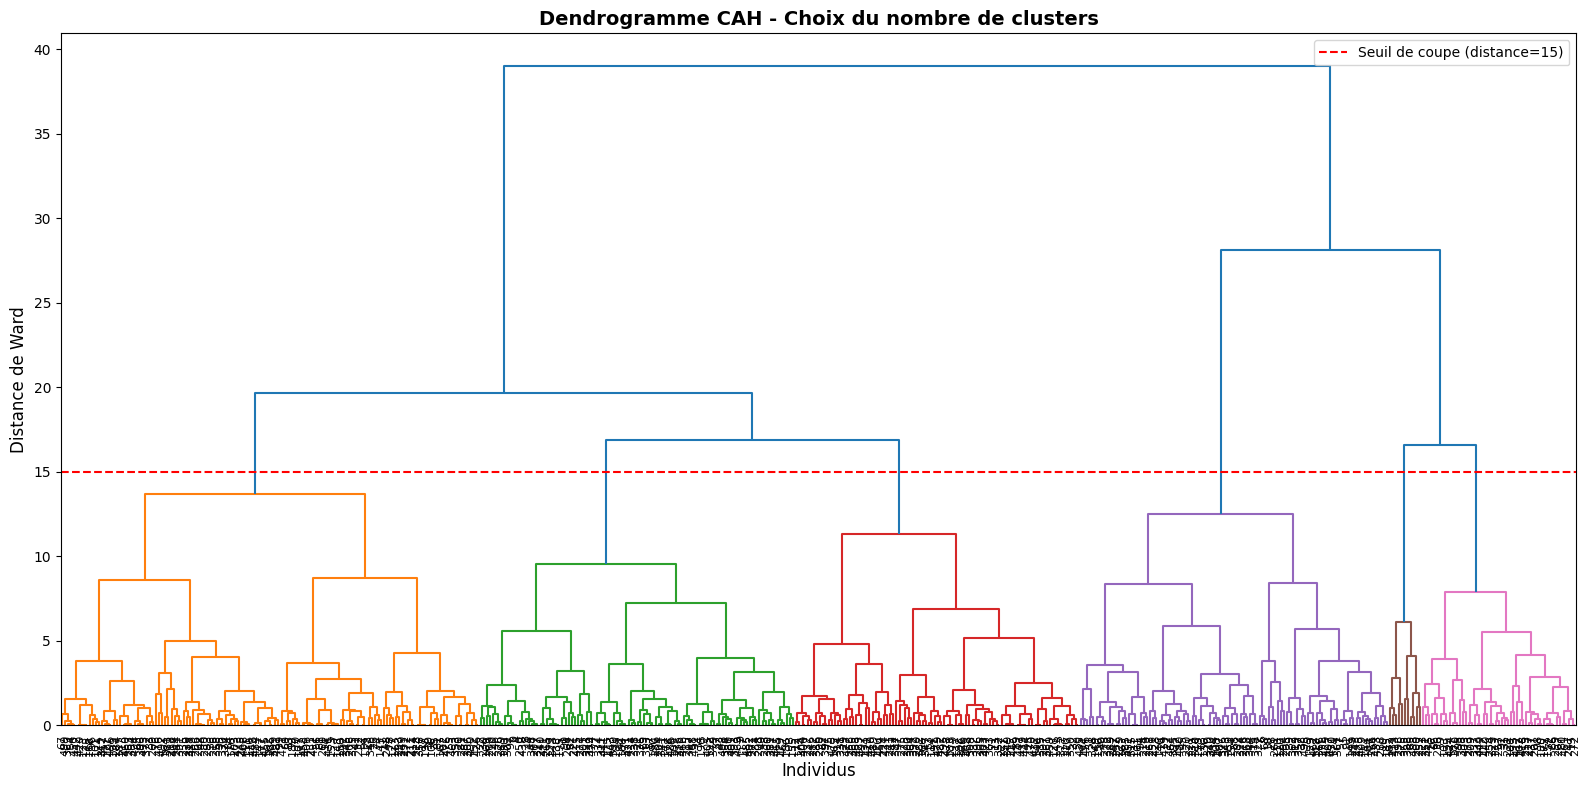

In [52]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Calcul de la matrice de liaison avec la méthode de Ward
Z = linkage(X_pca, method='ward')

# Configuration du style et de la taille de la figure
plt.figure(figsize=(16, 8))

# Tracé du dendrogramme avec personnalisation
dendrogram(
    Z,
    labels=df.index.tolist(),  # Étiquettes des individus
    leaf_rotation=90,                       # Rotation des étiquettes
    leaf_font_size=8,                       # Taille des étiquettes
    color_threshold=15                      # Couleur des branches sous le seuil
)

# Ajout d'une ligne de seuil pour la coupe des clusters
plt.axhline(y=15, color='red', linestyle='--', linewidth=1.5, label='Seuil de coupe (distance=15)')

# Personnalisation des labels et du titre
plt.title("Dendrogramme CAH - Choix du nombre de clusters", fontsize=14, fontweight='bold')
plt.xlabel("Individus", fontsize=12)
plt.ylabel("Distance de Ward", fontsize=12)
plt.legend(loc='upper right', frameon=True)

# Ajustement de la mise en page et affichage
plt.tight_layout()
plt.show()

In [53]:
from scipy.cluster.hierarchy import fcluster

# Choix du nombre de clusters
clusters_cah = fcluster(Z, t=3, criterion='maxclust')

# Ajout des clusters au DataFrame
sample_df_clean = df.copy()  # Ajoute cette ligne avant d'assigner la colonne
sample_df_clean['Cluster_CAH'] = clusters_cah


* À une distance de Ward de 15, les trois branches principales du dendrogramme divergent fortement, indiquant trois groupes homogènes et distincts.

* En dessous de ce seuil, les clusters deviennent trop fragmentés (sur-segmentation).

* Au-dessus, les clusters fusionnent en groupes trop larges et hétérogènes.

# 2. K-means

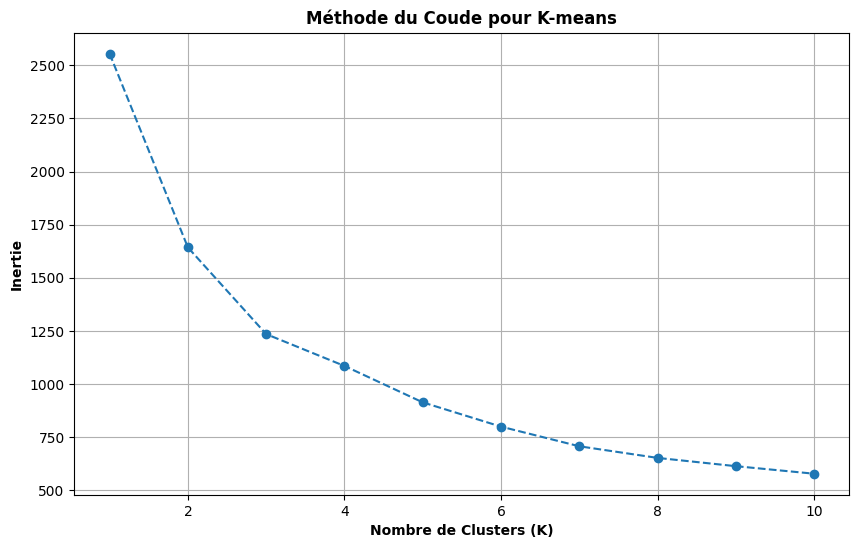

In [54]:
from sklearn.cluster import KMeans

# Calcul de l'inertie pour K=1 à K=10
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)

# Tracé de la courbe du coude
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.xlabel("Nombre de Clusters (K)", fontweight='bold')
plt.ylabel("Inertie", fontweight='bold')
plt.title("Méthode du Coude pour K-means", fontweight='bold')
plt.grid()
plt.show()

In [55]:
kmeans = KMeans(n_clusters=3, random_state=42)
clusters_kmeans = kmeans.fit_predict(X_pca)

# Ajout des clusters au DataFrame
sample_df_clean['Cluster_Kmeans'] = clusters_kmeans

Le choix de 3 clusters s’appuie sur le ralentissement marqué de la baisse d’inertie entre K=3 et K=4 (inertie passe de 1600 à 1250, soit une diminution de seulement 16.7% contre 40% entre K=2 et K=3). Ce point forme un "coude", indiquant que 3 clusters capturent l’essentiel de la structure des données, tout en évitant la complexité de clusters supplémentaires peu informatifs.

# 3. Visualisation des Clusters

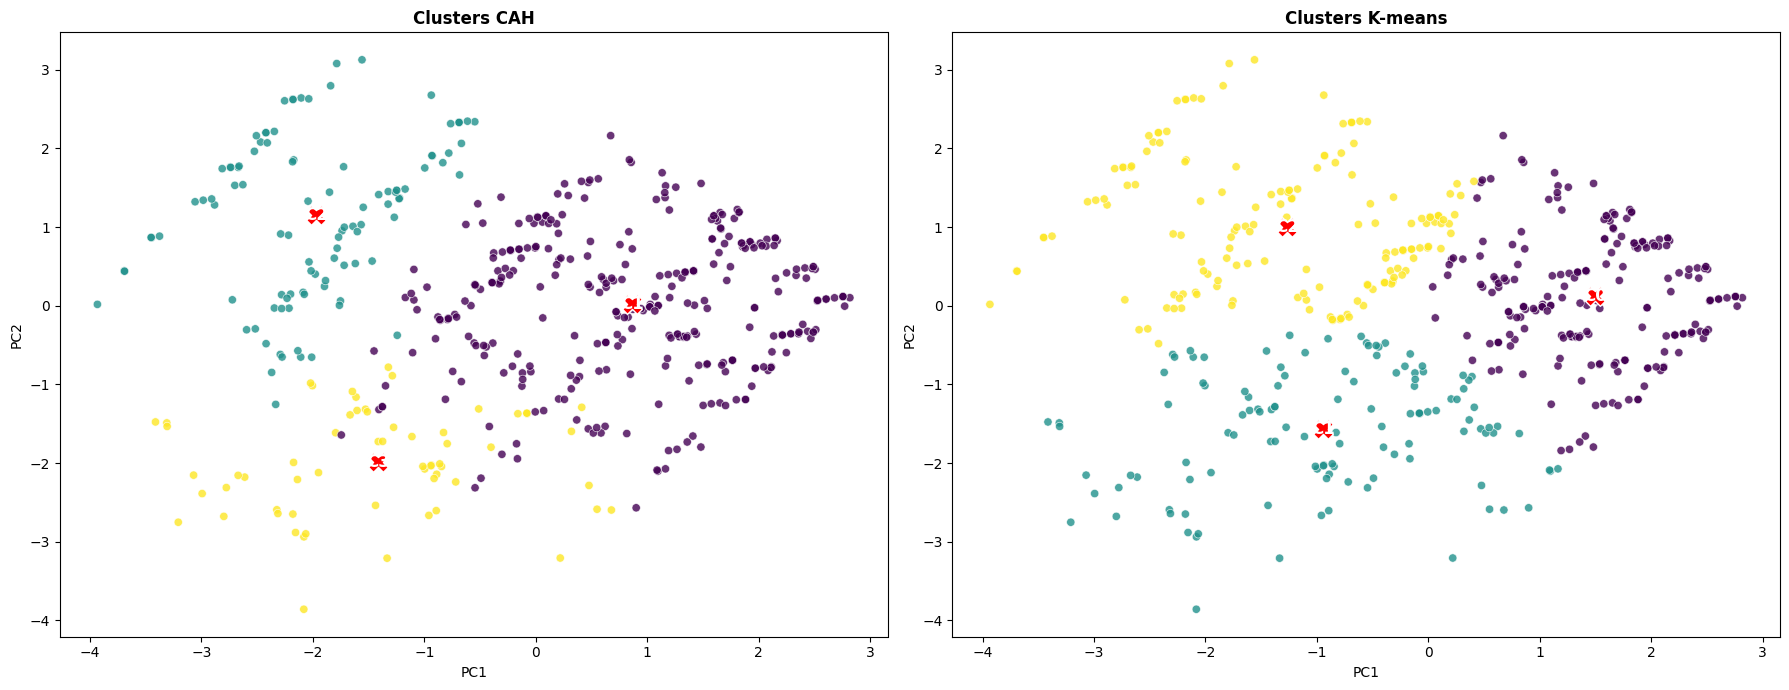

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# --- CAH ---
sns.scatterplot(
    x=X_pca[:, 0], y=X_pca[:, 1],
    hue=sample_df_clean['Cluster_CAH'],
    palette="viridis",
    alpha=0.8,
    ax=axes[0],
    legend=False
)
axes[0].set_title("Clusters CAH", fontweight='bold')
axes[0].set_xlabel("PC1")
axes[0].set_ylabel("PC2")

# Ajouter les centroïdes CAH
for cluster in np.unique(sample_df_clean['Cluster_CAH']):
    cluster_points = X_pca[sample_df_clean['Cluster_CAH'] == cluster]
    centroid = cluster_points.mean(axis=0)
    axes[0].scatter(centroid[0], centroid[1], color='red', marker='X', s=200, edgecolors='white')
    axes[0].text(centroid[0], centroid[1], f"C{cluster}", fontsize=12, weight='bold',
                 ha='center', va='center', color='white')

# --- K-means ---
sns.scatterplot(
    x=X_pca[:, 0], y=X_pca[:, 1],
    hue=sample_df_clean['Cluster_Kmeans'],
    palette="viridis",
    alpha=0.8,
    ax=axes[1],
    legend=False
)
axes[1].set_title("Clusters K-means", fontweight='bold')
axes[1].set_xlabel("PC1")
axes[1].set_ylabel("PC2")

# Ajouter les centroïdes K-means
for cluster in np.unique(sample_df_clean['Cluster_Kmeans']):
    cluster_points = X_pca[sample_df_clean['Cluster_Kmeans'] == cluster]
    centroid = cluster_points.mean(axis=0)
    axes[1].scatter(centroid[0], centroid[1], color='red', marker='X', s=200, edgecolors='white')
    axes[1].text(centroid[0], centroid[1], f"C{cluster}", fontsize=12, weight='bold',
                 ha='center', va='center', color='white')

plt.tight_layout()
plt.show()



##  CAH – Classification Ascendante Hiérarchique (gauche)

- **Répartition visuelle** :
  - Clusters **moins compacts**, adaptés à des structures **hiérarchiques**.
  - Le cluster jaune en bas à gauche : **insatisfaction forte / retards élevés**.
  - Le cluster violet (centre) : utilisateurs **modérément satisfaits**.
  - Le cluster turquoise (haut gauche) : **satisfaction partielle** avec retards modérés.

- **Centroïdes** :
  - Placés pour la visualisation ; **moins représentatifs**.
  - Parfois éloignés du cœur des groupes.

- **Conclusion** :
  > CAH capte des **formes irrégulières** et des relations hiérarchiques dans les données. Utile pour une **analyse exploratoire**.

---

##  K-means (droite)

- **Répartition visuelle** :
  - Clusters **sphériques et équilibrés**.
  - Violet (droite) : **satisfaction élevée** (valeurs PC1 > 0).
  - Jaune (haut) : **satisfaction moyenne / retards modérés**.
  - Turquoise (bas gauche) : **insatisfaction liée aux retards**.

- **Centroïdes** :
  - Bien centrés, **représentent les profils moyens** des groupes.

- **Conclusion** :
  > K-means génère des **groupes compacts** adaptés à la segmentation marketing ou à la classification automatique.

---

##  Comparaison Synthétique

| Critère                | CAH                                 | K-means                            |
|------------------------|--------------------------------------|-------------------------------------|
| **Nombre de clusters** | 3 (0, 1, 2)                          | 3 (0, 1, 2)                         |
| **Forme des groupes**  | Irrégulière, hiérarchique            | Compacte, sphérique                |
| **Centroïdes**         | Moins fiables (visualisation)        | Bien représentatifs                |
| **Utilité**            | Analyse hiérarchique/exploratoire    | Segmentation opérationnelle        |

---

           





---



# V- Synthèse Stratégique : Recommandations pour la Compagnie Aérienne



## 1. Segmentation Clients et Priorités d’Action

### Cluster « Insatisfaction forte / retards élevés »
- Méthodes : K-means (Turquoise) / CAH (Jaune)
- Priorité : Réduire les retards
- Actions :
  - Optimisation des plannings et communication proactive
  - Compensation automatique : bonus fidélité, accès lounge pour retards > 30 minutes

### Cluster « Satisfaction moyenne »
- Méthodes : K-means (Jaune) / CAH (Violet)
- Priorité : Améliorer les services à bord (Wi-Fi, divertissement, réservation)
- Actions :
  - Lancement d’un bundle « Confort Connecté » : Wi-Fi gratuit + divertissement premium sur vols longs

### Cluster « Satisfaction élevée »
- Méthodes : K-means (Violet) / CAH (Turquoise)
- Priorité : Renforcer la fidélisation des voyageurs d’affaires
- Actions :
  - Programme « Business Elite » : sièges premium, accès prioritaire, services personnalisés



## 2. Optimisation des Services

### Gestion des retards
- Système de prédiction des retards avec notifications en temps réel via application mobile
- Formation des équipes à la gestion de crise

### Confort et divertissement
- Modernisation des sièges économiques (espace, ports USB)
- Extension du catalogue de divertissement via partenariats streaming

### Réservation en ligne
- Simplification de l’interface
- Ajout d’un service de chat en direct pour l’assistance



## 3. Personnalisation de l’Offre

### Clients fidèles
- Upgrades gratuits, événements exclusifs, accès lounge

### Voyageurs d’affaires
- Services « porte-à-porte » : transferts privés, enregistrement prioritaire

## Tableau des Actions Clés

| Segment Cible                    | Objectif                         | Action Concrète                               | Métrique de Suivi              |
|----------------------------------|----------------------------------|-----------------------------------------------|--------------------------------|
| Clients insatisfaits (retards)   | Réduire l’impact des retards     | Compensation après 30 min de retard           | Taux de réclamation ↓ 20%      |
| Clients modérément satisfaits    | Améliorer les services digitaux  | Bundle « Confort Connecté »                   | NPS services digitaux ↑ 15%    |
| Clients fidèles (Business)       | Augmenter la rétention           | Programme « Business Elite »                  | Taux de réengagement ↑ 25%     |


           





---



# VI- Conclusion et Perspectives




### Bilan des Résultats
- Segmentation claire : 3 profils (insatisfaits, modérés, satisfaits)
- Facteurs critiques : retards, confort, bagages
- Méthodes :
  - CAH : Hiérarchie utile
  - K-means : Groupes opérationnels efficaces

### Limites de l’Étude
- Échantillon réduit (500 passagers)
- Variables contextuelles absentes (fréquence, dépenses)
- Exclusion de la variable cible « Satisfaction »
- Données issues de Kaggle (pas une compagnie réelle)

### Perspectives
- Intégration de données temps réel (CRM, post-vol)
- Analyse saisonnière
- Modélisation IA pour prédire la satisfaction
- Recommandations dynamiques via application mobile
- Études complémentaires : fidélité et dépenses à bord

### Citation Clé
> "La satisfaction client n’est pas un objectif, c’est un voyage. Les données en sont la boussole, mais l’action en est le moteur."
